<a href="https://colab.research.google.com/github/gabrielgnobre7/Dissertacaoinicial/blob/main/GitHub_Disserta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1ª ETAPA: JUNTAR BASE DEPOSITANTES, DEPOSITO E CLASSES

In [ ]:
import pandas as pd

base_deposito = pd.read_csv("/content/drive/MyDrive/Mestrado UFMG/Dissertação/badepiv10_mrc (1)/badepiv10_mrc_deposito.csv",
                                 encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")

base_autor = pd.read_csv("/content/drive/MyDrive/Mestrado UFMG/Dissertação/badepiv10_mrc (1)/badepiv10_mrc_depositante.csv",
                         encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")

base_classe = pd.read_csv("/content/drive/MyDrive/Mestrado UFMG/Dissertação/badepiv10_mrc (1)/badepiv10_mrc_classe.csv",
                          encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")

# 1. Juntando as bases depósito com base de classe

base_deposito = pd.merge(
    base_deposito,
    base_classe,
    on="NO_PROCESS",
    how="left"
)

# 2. Juntando as bases com a base de autores (depositantes)

BADEPI_atualizada = pd.merge(
    base_autor,
    base_deposito,
    on="NO_PROCESS",
    how="left"
)

print(BADEPI_atualizada)

BADEPI_atualizada.to_csv('/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/Dissertação/Análise de Dados/0.BADEPI_Marcas.csv',index=False, encoding="ISO-8859-1" )

#TENS AGORA UMA SUPER BASE


        NO_PROCESS CD_TIPO_PFPJ     NO_CNPJ_CPF  \
0        933095198            J  48274689000179   
1        933094604            J  13801037000160   
2        933094361            F     ***099914**   
3        933094361            F     ***786374**   
4        933094361            F     ***509144**   
...            ...          ...             ...   
4337225  822347547          NaN             NaN   
4337226  822347660            J  03278471000154   
4337227  822346192            F     ***029927**   
4337228  822406438          NaN             NaN   
4337229  822403790            J  17635301000194   

                                           NM_COMPLET_PFPJ CD_PAIS_PFPJ  \
0                            HCO COMERCIO ALIMENTICIO LTDA           BR   
1              SANTOS E DUNDA INDUSTRIA DE CONFECÇÕES LTDA           BR   
2                        KÁRCIO JEREMIAS DA SILVA OLIVEIRA           BR   
3                      JOÃO HENRIQUE SILVA ALVES DE ARAÚJO           BR   
4           

# 2ª ETAPA: ANÁLISE DESCRITIVA DOS CAMPOS E BASE

In [ ]:
import pandas as pd

# 🚀 1. Carregar a base de dados
df = pd.read_csv('/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/Dissertação/Análise de Dados/0.BADEPI_Marcas.csv',
                 encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")

# Filtrar apenas onde 'CD_PAIS_PFPJ' é 'BR'
df = df[df['CD_PAIS_PFPJ'] == 'BR']

# Definir manualmente as colunas categóricas
colunas_categoricas = ["CD_NATUREZ_MARCA", "DS_NATUREZ_MARCA", "CD_APRESEN_MARCA"
                       "CD_CLASSE_NICE", "REV_CLASSE_NICE", "ST_CLASSE_NICE", "TP_ENTRADA","CD_UF_PFPJ"
                       , "CD_IBGE_CIDADE"]

# Garantir que as colunas existem no DataFrame antes de manipulá-las
colunas_existentes = [col for col in colunas_categoricas if col in df.columns]

# Garantir que as colunas são tratadas como categóricas
df[colunas_existentes] = df[colunas_existentes].astype("category")

# Criar um arquivo de saída
caminho_saida = "/content/drive/MyDrive/Mestrado UFMG/Dissertação/resumo_categorias.txt"
with open(caminho_saida, "w", encoding="utf-8") as f:
    for col in colunas_existentes:
        contagem = df[col].value_counts()
        total_geral = contagem.sum()  # Calcula o total geral da coluna

        f.write(f"Coluna: {col}\n")
        f.write(contagem.to_string())  # Escrever a contagem de classes
        f.write(f"\nTotal Geral: {total_geral}\n")  # Adiciona a linha com o total geral
        f.write("\n" + "-"*40 + "\n")

print(f"Arquivo '{caminho_saida}' criado com sucesso!")

quantidade_unicos = df['NO_PROCESS'].nunique()
print(f"Número de No_process únicos na base filtrada: {quantidade_unicos}")

display(df)

Arquivo '/content/drive/MyDrive/Mestrado UFMG/Dissertação/resumo_categorias.txt' criado com sucesso!
Número de No_process únicos na base filtrada: 3618601


,NO_PROCESS,CD_TIPO_PFPJ,NO_CNPJ_CPF,NM_COMPLET_PFPJ,CD_PAIS_PFPJ,CD_UF_PFPJ,NM_CIDADE_PFPJ,CD_IBGE_CIDADE,TP_ENTRADA,DT_DEPOSIT_PROCESS,DT_ENTRADA_INPI,CD_NATUREZ_MARCA,DS_NATUREZ_MARCA,CD_APRESEN_MARCA,CD_CLASSE_NICE,REV_CLASSE_NICE,ST_CLASSE_NICE
0,933095198,J,48274689000179,HCO COMERCIO ALIMENTICIO LTDA,BR,RJ,Barra Mansa,3300407,M,31/12/2023,31/12/2023,8.0,Marca de Produto/Serviço,M,29,12,P
1,933094604,J,13801037000160,SANTOS E DUNDA INDUSTRIA DE CONFECÇÕES LTDA,BR,PE,Santa Cruz do Capibaribe,2612505,M,30/12/2023,30/12/2023,8.0,Marca de Produto/Serviço,M,25,12,P
2,933094361,F,***099914**,KÁRCIO JEREMIAS DA SILVA OLIVEIRA,BR,PE,Recife,2611606,M,30/12/2023,30/12/2023,8.0,Marca de Produto/Serviço,M,38,12,P
3,933094361,F,***786374**,JOÃO HENRIQUE SILVA ALVES DE ARAÚJO,BR,PE,Camaragibe,2603454,M,30/12/2023,30/12/2023,8.0,Marca de Produto/Serviço,M,38,12,P
4,933094361,F,***509144**,ROGÉRIO LEITE ARAÚJO,BR,BA,Iraquara,2914406,M,30/12/2023,30/12/2023,8.0,Marca de Produto/Serviço,M,38,12,P
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4337223,821930648,J,02204669000120,BY GRACE COMPANY CONFECÇÕES LTDA,BR,SP,SÃO PAULO,3550308,M,06/01/2000,06/01/2000,2.0,Marca de Serviço,D,42,7,Y
4337224,822388413,J,03359095000122,DOCEAMOR CESTAS E PRESENTES LTDA ME,BR,DF,BRASÍLIA,5300108,M,06/01/2000,06/01/2000,2.0,Marca de Serviço,D,42,7,P
4337226,822347660,J,03278471000154,RECON RIO REFRESCOS E CONCENTRADOS IND. E COM....,BR,RJ,RIO DE JANEIRO,3304557,M,05/01/2000,05/01/2000,1.0,Marca de Produto,D,32,7,P
4337227,822346192,F,***029927**,RAFAEL NARDI,BR,RJ,RIO DE JANEIRO,3304557,M,04/01/2000,04/01/2000,2.0,Marca de Serviço,D,41,7,Y


# 3ª ETAPA: LIMPANDO BASE DE DADOS

### 3.1 REMOVENDO MARCAS SEM CD_IBGE_CIDADE

In [ ]:
import pandas as pd
# 🚀 1. Carregar a base de dados
df = pd.read_csv("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/[2025.02]/Dissertação/Análise de Dados/0.BADEPI_Marcas.csv",
                 encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")

# Filtrar apenas onde 'CD_PAIS_PFPJ' é 'BR'
df = df[df['CD_PAIS_PFPJ'] == 'BR']

# Filtrar apenas CD_IBGE_CIDADE existente
df = df[df['CD_IBGE_CIDADE'] != '0000000']

#df = df[~df['CD_IBGE_CIDADE'].isna()]

# Filtrar apenas onde UF existente
df = df[df['CD_UF_PFPJ'] != 'YY']
#3135274

quantidade_unicos = df['NO_PROCESS'].nunique()
print(f"Número de No_process únicos na base filtrada: {quantidade_unicos}")

df.to_csv("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/[2025.02]/Dissertação/Análise de Dados/1.BADEPI_Marcas_Limp.csv",
                         index=False, encoding="ISO-8859-1")

Número de No_process únicos na base filtrada: 3135274


# 4ª ETAPA: ADICIONANDO AS REGIÕES IMEDIATAS NA BASE

In [ ]:
# 🚀 1. Carregar a base de dados
df = pd.read_csv("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/Dissertação/Análise de Dados/1.BADEPI_Marcas_Limp.csv",
                 encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")
# Carregar base de dados IBGE
df_rgi = pd.read_csv("/content/drive/MyDrive/GEIDER/Bases Criadas BADEPI/regioes_ibge_com_ufs.csv",
                 encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")

# Renomear coluna da base IBGE para o mesmo para usar o merge
df_rgi = df_rgi.rename(columns={'CD_GEOCODI': 'CD_IBGE_CIDADE'})

# Converter ambas colunas para string pois pode haver rgi começando com 0 e a gente perder a informação (acho difícil)
df['CD_IBGE_CIDADE'] = df['CD_IBGE_CIDADE'].astype(str)
df_rgi['CD_IBGE_CIDADE'] = df_rgi['CD_IBGE_CIDADE'].astype(str)

# Juntando
junto = df.merge(
    df_rgi[['CD_IBGE_CIDADE','cod_rgi', 'nome_rgi']],
    on="CD_IBGE_CIDADE",
    how="left"
)

# Substituir o travessão por hífen comum APENAS na coluna problemática
junto['nome_rgi'] = junto['nome_rgi'].str.replace('\u2013', '-', regex=False)

junto.to_csv("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/Dissertação/Análise de Dados/2.BADEPI_Marcas_RGI.csv",
                        index=False, encoding="ISO-8859-1")

# 5ª ETAPA: ANÁLISE DESCRITIVA

In [ ]:
import pandas as pd

# 🚀 1. Carregar a base de dados
df = pd.read_csv("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/Dissertação/Análise de Dados/2.BADEPI_Marcas_RGI.csv",
                 encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")

display(df)

# Definir manualmente as colunas categóricas
# colunas_categoricas = ["CD_NATUREZ_MARCA", "DS_NATUREZ_MARCA", "CD_APRESEN_MARCA"
#                        "CD_CLASSE_NICE", "REV_CLASSE_NICE", "CD_CLASSE_NICE", "TP_ENTRADA","cod_rgi",
#                        "nome_rgi"]

# # Garantir que as colunas existem no DataFrame antes de manipulá-las
# colunas_existentes = [col for col in colunas_categoricas if col in df.columns]

# # Garantir que as colunas são tratadas como categóricas
# df[colunas_existentes] = df[colunas_existentes].astype("category")

# # Criar um arquivo de saída
# caminho_saida = "/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/Dissertação/Análise de Dados/resumo_categorias_filt_rgi.txt"
# with open(caminho_saida, "w", encoding="utf-8") as f:
#     for col in colunas_existentes:
#         contagem = df[col].value_counts()
#         total_geral = contagem.sum()  # Calcula o total geral da coluna

#         f.write(f"Coluna: {col}\n")
#         f.write(contagem.to_string())  # Escrever a contagem de classes
#         f.write(f"\nTotal Geral: {total_geral}\n")  # Adiciona a linha com o total geral
#         f.write("\n" + "-"*40 + "\n")

# print(f"Arquivo '{caminho_saida}' criado com sucesso!")

# quantidade_unicos = df['NO_PROCESS'].nunique()
# print(f"Número de No_process únicos na base filtrada: {quantidade_unicos}")

quantidade_unicos = df['NO_PROCESS'].nunique()
print(f"Número de No_process únicos na base filtrada: {quantidade_unicos}")

,NO_PROCESS,CD_TIPO_PFPJ,NO_CNPJ_CPF,NM_COMPLET_PFPJ,CD_PAIS_PFPJ,CD_UF_PFPJ,NM_CIDADE_PFPJ,CD_IBGE_CIDADE,TP_ENTRADA,DT_DEPOSIT_PROCESS,DT_ENTRADA_INPI,CD_NATUREZ_MARCA,DS_NATUREZ_MARCA,CD_APRESEN_MARCA,CD_CLASSE_NICE,REV_CLASSE_NICE,ST_CLASSE_NICE,cod_rgi,nome_rgi
0,933095198,J,48274689000179,HCO COMERCIO ALIMENTICIO LTDA,BR,RJ,Barra Mansa,3300407,M,31/12/2023,31/12/2023,8.0,Marca de Produto/Serviço,M,29,12,P,330004,Volta Redonda - Barra Mansa
1,933094604,J,13801037000160,SANTOS E DUNDA INDUSTRIA DE CONFECÇÕES LTDA,BR,PE,Santa Cruz do Capibaribe,2612505,M,30/12/2023,30/12/2023,8.0,Marca de Produto/Serviço,M,25,12,P,260009,Caruaru
2,933094361,F,***099914**,KÁRCIO JEREMIAS DA SILVA OLIVEIRA,BR,PE,Recife,2611606,M,30/12/2023,30/12/2023,8.0,Marca de Produto/Serviço,M,38,12,P,260001,Recife
3,933094361,F,***786374**,JOÃO HENRIQUE SILVA ALVES DE ARAÚJO,BR,PE,Camaragibe,2603454,M,30/12/2023,30/12/2023,8.0,Marca de Produto/Serviço,M,38,12,P,260001,Recife
4,933094361,F,***509144**,ROGÉRIO LEITE ARAÚJO,BR,BA,Iraquara,2914406,M,30/12/2023,30/12/2023,8.0,Marca de Produto/Serviço,M,38,12,P,290034,Seabra
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3159492,821930648,J,02204669000120,BY GRACE COMPANY CONFECÇÕES LTDA,BR,SP,SÃO PAULO,3550308,M,06/01/2000,06/01/2000,2.0,Marca de Serviço,D,42,7,Y,350001,SÃ£o Paulo
3159493,822388413,J,03359095000122,DOCEAMOR CESTAS E PRESENTES LTDA ME,BR,DF,BRASÍLIA,5300108,M,06/01/2000,06/01/2000,2.0,Marca de Serviço,D,42,7,P,530001,Distrito Federal
3159494,822347660,J,03278471000154,RECON RIO REFRESCOS E CONCENTRADOS IND. E COM....,BR,RJ,RIO DE JANEIRO,3304557,M,05/01/2000,05/01/2000,1.0,Marca de Produto,D,32,7,P,330001,Rio de Janeiro
3159495,822346192,F,***029927**,RAFAEL NARDI,BR,RJ,RIO DE JANEIRO,3304557,M,04/01/2000,04/01/2000,2.0,Marca de Serviço,D,41,7,Y,330001,Rio de Janeiro


Número de No_process únicos na base filtrada: 3100392


In [ ]:
#TOTAL DE MARCAS QUE SÃO PRODUTOS E TOTAL QUE SÃO SERVIÇOS
import pandas as pd


# Garantir que está como número
#df['CD_CLASSE_NICE'] = pd.to_numeric(df['CD_CLASSE_NICE'], errors='coerce')

# Filtrar apenas as classes desejadas
filtro = df['CD_CLASSE_NICE'].between(1, 45)  # inclui 35 e 45

# Agrupar e contar valores únicos
resultado = (
    df[filtro]
    .groupby('CD_CLASSE_NICE')['NO_PROCESS']
    .nunique()
    .reset_index(name='total_processos_unicos')
)

soma = resultado['total_processos_unicos'].sum()
sorteado = resultado.sort_values(by='total_processos_unicos', ascending=False)
print(soma)
print(sorteado)

sorteado.to_csv("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/[2025.02]/Dissertação/Análise de Dados/somatotal.csv")

3101011
    CD_CLASSE_NICE  total_processos_unicos
34              35                  696326
40              41                  382044
24              25                  192577
41              42                  162996
43              44                  140087
42              43                  138571
36              37                  127492
29              30                  116637
35              36                  111426
8                9                   92552
2                3                   92413
4                5                   84375
15              16                   70144
38              39                   68858
44              45                   53200
37              38                   50104
28              29                   49283
39              40                   45669
31              32                   42181
30              31                   35543
0                1                   29901
19              20                   28747
32 

In [ ]:
# Primeiro, identifique todos os processos com múltiplas classes
processos_multiplas_classes = (
    df.groupby('NO_PROCESS')['CD_CLASSE_NICE']
    .nunique()
    .reset_index(name='qtd_classes_distintas')
)
processos_multiplas_classes = processos_multiplas_classes[processos_multiplas_classes['qtd_classes_distintas'] > 1]

# Agora, para cada processo com múltiplas classes, verifique se possui classes de produtos e serviços
processos_mistos = []

for processo in processos_multiplas_classes['NO_PROCESS']:
    classes_do_processo = df[df['NO_PROCESS'] == processo]['CD_CLASSE_NICE'].unique()

    # Verifica se tem classes de produtos (1-34) e serviços (35-45)
    tem_produto = any(1 <= classe <= 34 for classe in classes_do_processo)
    tem_servico = any(35 <= classe <= 45 for classe in classes_do_processo)

    if tem_produto and tem_servico:
        processos_mistos.append({
            'NO_PROCESS': processo,
            'classes': classes_do_processo,
            'qtd_classes': len(classes_do_processo)
        })

# Converter para DataFrame
df_processos_mistos = pd.DataFrame(processos_mistos)

print(f"Total de processos mistos (produtos e serviços): {len(df_processos_mistos)}")
print("\nExemplos de processos mistos:")
for i, row in df_processos_mistos.head(10).iterrows():
    print(f"Processo: {row['NO_PROCESS']}, Classes: {sorted(row['classes'])}, Quantidade: {row['qtd_classes']}")

Total de processos mistos (produtos e serviços): 154

Exemplos de processos mistos:
Processo: 822721961, Classes: [np.int64(29), np.int64(35)], Quantidade: 2
Processo: 825462401, Classes: [np.int64(25), np.int64(40)], Quantidade: 2
Processo: 826797636, Classes: [np.int64(9), np.int64(35)], Quantidade: 2
Processo: 827272952, Classes: [np.int64(25), np.int64(35)], Quantidade: 2
Processo: 827598726, Classes: [np.int64(17), np.int64(37)], Quantidade: 2
Processo: 827989040, Classes: [np.int64(25), np.int64(35)], Quantidade: 2
Processo: 829585915, Classes: [np.int64(3), np.int64(35)], Quantidade: 2
Processo: 829751939, Classes: [np.int64(25), np.int64(35)], Quantidade: 2
Processo: 830331247, Classes: [np.int64(10), np.int64(37)], Quantidade: 2
Processo: 830421610, Classes: [np.int64(25), np.int64(35)], Quantidade: 2


### 5.1 Mapas?

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 34.8 MB/s eta 0:00:00


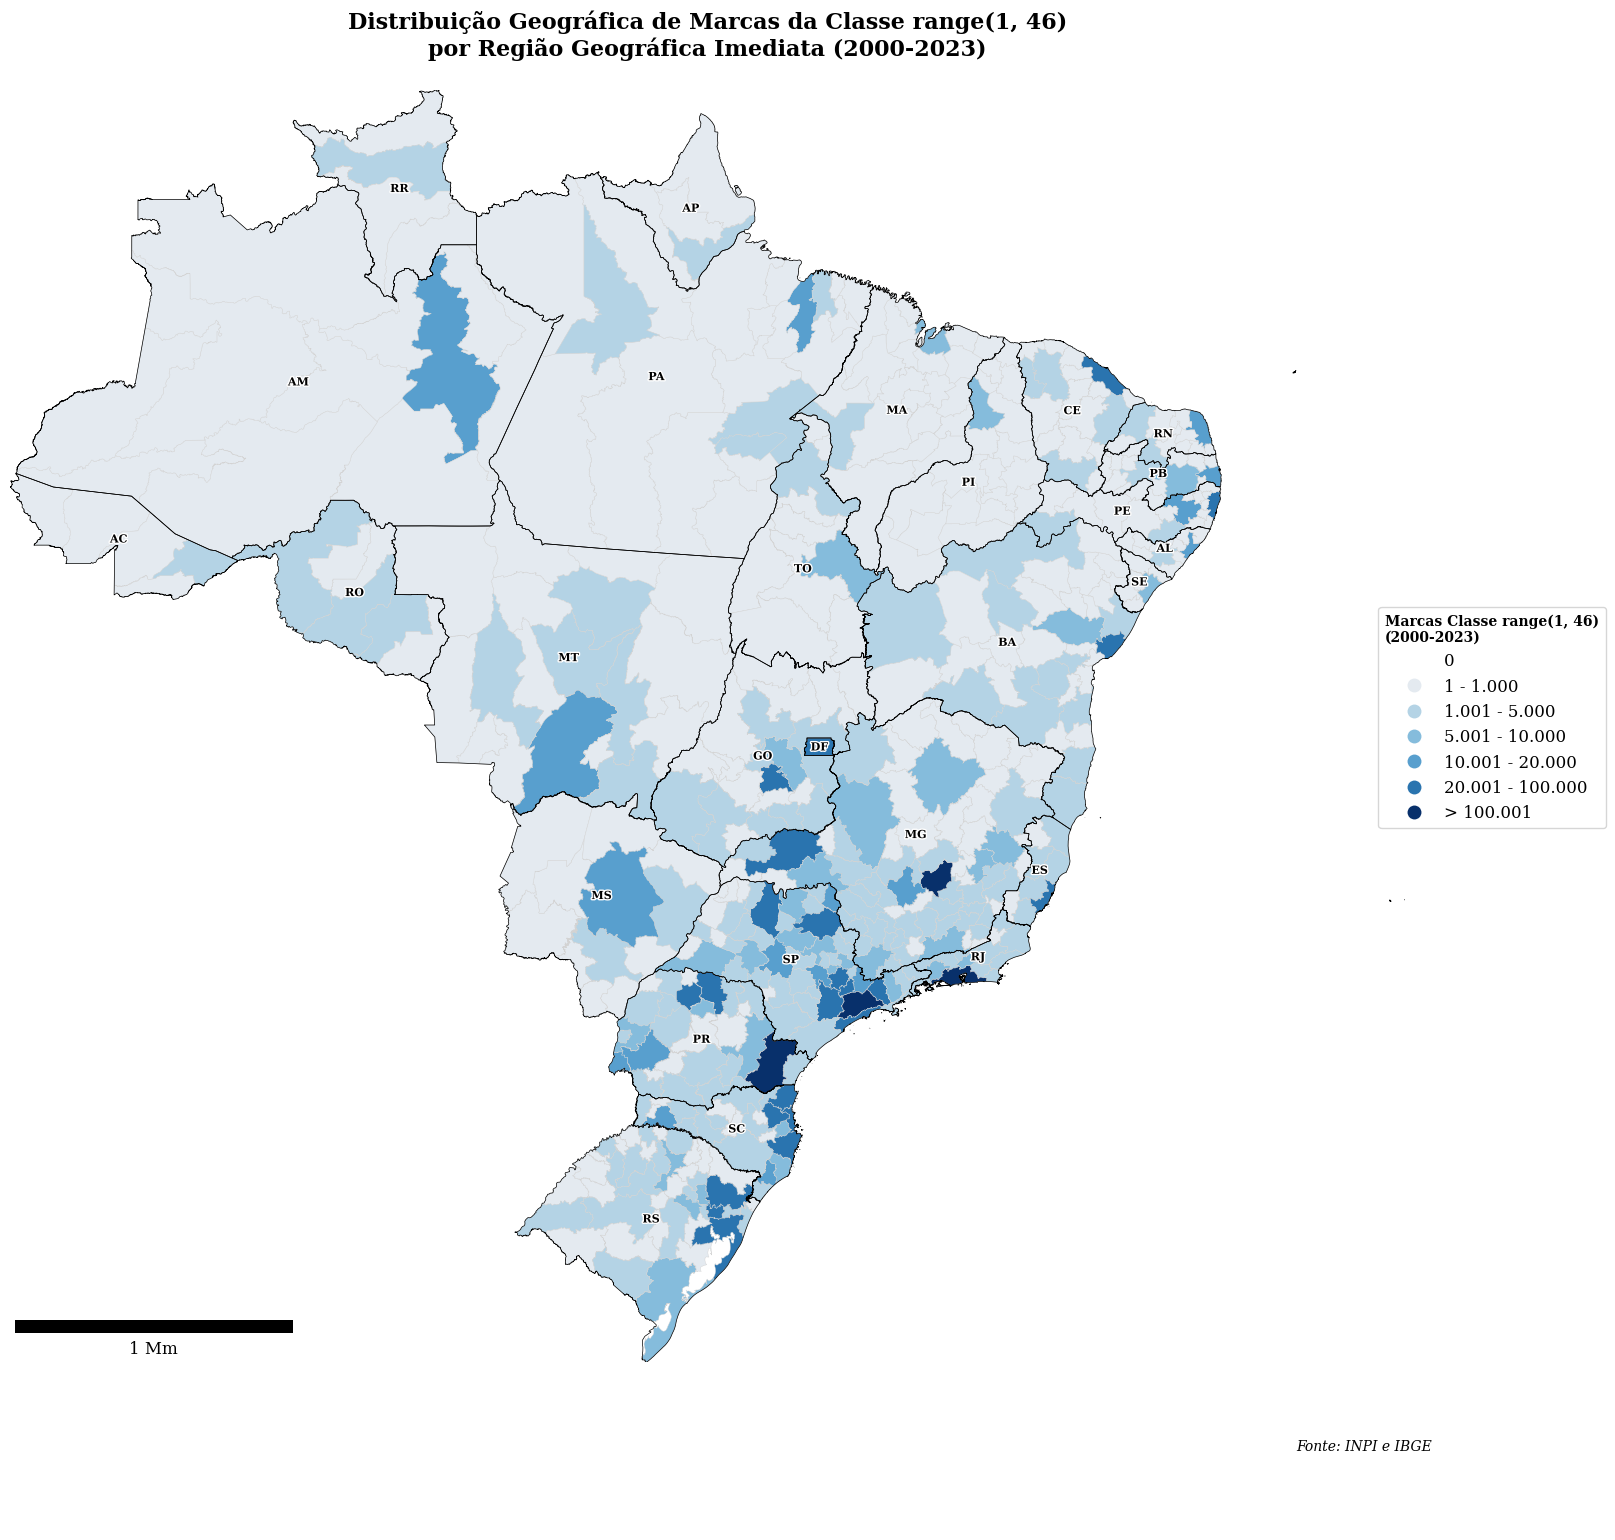

In [ ]:
!pip install geopandas matplotlib contextily matplotlib-scalebar
# ====================
# 1. IMPORTAÇÕES
# ====================
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patheffects import withStroke
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx
import os

# ====================
# 2. CONFIGURAÇÕES
# ====================
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.dpi': 300
})

# ====================
# 3. CARREGAR DADOS (AJUSTE OS CAMINHOS!)
# ====================
# Configurar caminhos
PATH_DADOS = "/content/drive/MyDrive/Mestrado UFMG/Dissertação/Shapefiles RGIs/"
PATH_SHP_RGI = os.path.join(PATH_DADOS, "BR_RG_Imediatas_2024.shp")
PATH_SHP_ESTADOS = os.path.join(PATH_DADOS, "BR_UF_2024.shp")
#PATH_CSV_MARCAS = os.path.join(PATH_DADOS, "badepi_mrc_atualizada_rgi.csv")

# Carregar dados
dados = pd.read_csv("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/[2025.02]/Dissertação/Análise de Dados/2.BADEPI_Marcas_RGI.csv",
                encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")
rgi_geo = gpd.read_file(PATH_SHP_RGI)
estados = gpd.read_file(PATH_SHP_ESTADOS)

# ====================
# 4. FILTROS DE CLASSE
# ====================
# Selecione a classe desejada (ex: 35) ou intervalo (ex: range(35,46))
# CLASSE_SELECIONADA = 35  # Altere para a classe desejada
CLASSE_SELECIONADA = range(1, 46)  # Para intervalo de classes

# Aplicar filtro de classe
if isinstance(CLASSE_SELECIONADA, int):
    dados = dados[dados['CD_CLASSE_NICE'] == CLASSE_SELECIONADA]
elif isinstance(CLASSE_SELECIONADA, range):
    dados = dados[dados['CD_CLASSE_NICE'].isin(CLASSE_SELECIONADA)]

# ====================
# 5. PROCESSAMENTO
# ====================
# Converter CRS
rgi_geo = rgi_geo.to_crs(epsg=3857)
estados = estados.to_crs(epsg=3857)

# Converter para datetime
dados['DT_DEPOSITO'] = pd.to_datetime(dados['DT_DEPOSIT_PROCESS'], dayfirst=True, errors='coerce')

# Filtrar de 2020
dados_filtrados = dados

# Agregar marcas por RGI
df_marcas = dados_filtrados.groupby('cod_rgi', as_index=False).agg(
    total_marcas=('NO_PROCESS', 'nunique')
)

# Merge e tratamento
rgi_geo['CD_RGI'] = rgi_geo['CD_RGI'].astype(str).str.strip()
df_marcas['cod_rgi'] = df_marcas['cod_rgi'].astype(str).str.strip()
mapa_df = rgi_geo.merge(
    df_marcas,
    left_on='CD_RGI',
    right_on='cod_rgi',
    how='left'
).fillna({'total_marcas': 0})

# ====================
# 6. CLASSIFICAÇÃO
# ====================
classes = [0, 1, 1000, 5000, 10000, 20000, 100000, float('inf')]
rotulos = [
    '0', '1 - 1.000', '1.001 - 5.000', '5.001 - 10.000',
    '10.001 - 20.000', '20.001 - 100.000', '> 100.001'
]

mapa_df['classe'] = pd.cut(
    mapa_df['total_marcas'],
    bins=classes,
    labels=rotulos,
    include_lowest=True,
    right=False
)

# ====================
# 7. PLOTAGEM DO MAPA
# ====================
fig, ax = plt.subplots(figsize=(18, 18))

# Cores e estilo
cores = ['#ffffff', '#dfe6ed', '#9ecae1', '#6baed6', '#3182bd', '#08306b']
cmap = LinearSegmentedColormap.from_list('azul_sequencial', colors=cores, N=len(rotulos))

# Plotar RGIs
mapa_df.plot(
    column='classe',
    cmap=cmap,
    edgecolor='#d3d3d3',
    linewidth=0.3,
    legend=True,
    ax=ax,
    missing_kwds={'color': 'lightgrey'}
)

# Bordas dos estados
estados.boundary.plot(
    ax=ax,
    color='black',
    linewidth=0.5
)

# Nomes dos estados
for idx, row in estados.iterrows():
    centroid = row.geometry.centroid
    ax.text(
        centroid.x,
        centroid.y,
        row['SIGLA_UF'],
        ha='center',
        va='center',
        fontsize=8,
        color='black',
        weight='bold',
        path_effects=[withStroke(linewidth=2, foreground='white')]
    )

# Limitar a visualização ao território brasileiro
xmin, ymin, xmax, ymax = estados.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Elementos cartográficos
ax.add_artist(ScaleBar(dx=1, units='m', location='lower left', scale_loc='bottom', length_fraction=0.2))

# Legenda
legenda = ax.get_legend()
legenda.set_bbox_to_anchor((1.15, 0.6))
legenda.set_title(f'Marcas Classe {CLASSE_SELECIONADA}\n(2000-2023)', prop={'size': 10, 'weight': 'bold'})

# Título
plt.title(
    f"Distribuição Geográfica de Marcas da Classe {CLASSE_SELECIONADA}\npor Região Geográfica Imediata (2000-2023)",
    fontsize=16,
    pad=25,
    weight='bold'
)

# Fonte
plt.annotate('Fonte: INPI e IBGE', xy=(0.72, 0.05), xycoords='figure fraction', fontsize=10, style='italic')

# ====================
# 8. SALVAR
# ====================
plt.axis('off')
plt.savefig(
    os.path.join(PATH_DADOS, f'mapa_classe_{CLASSE_SELECIONADA}_2020.png'),
    bbox_inches='tight',
    pad_inches=0.3,
    dpi=300
)
plt.show()


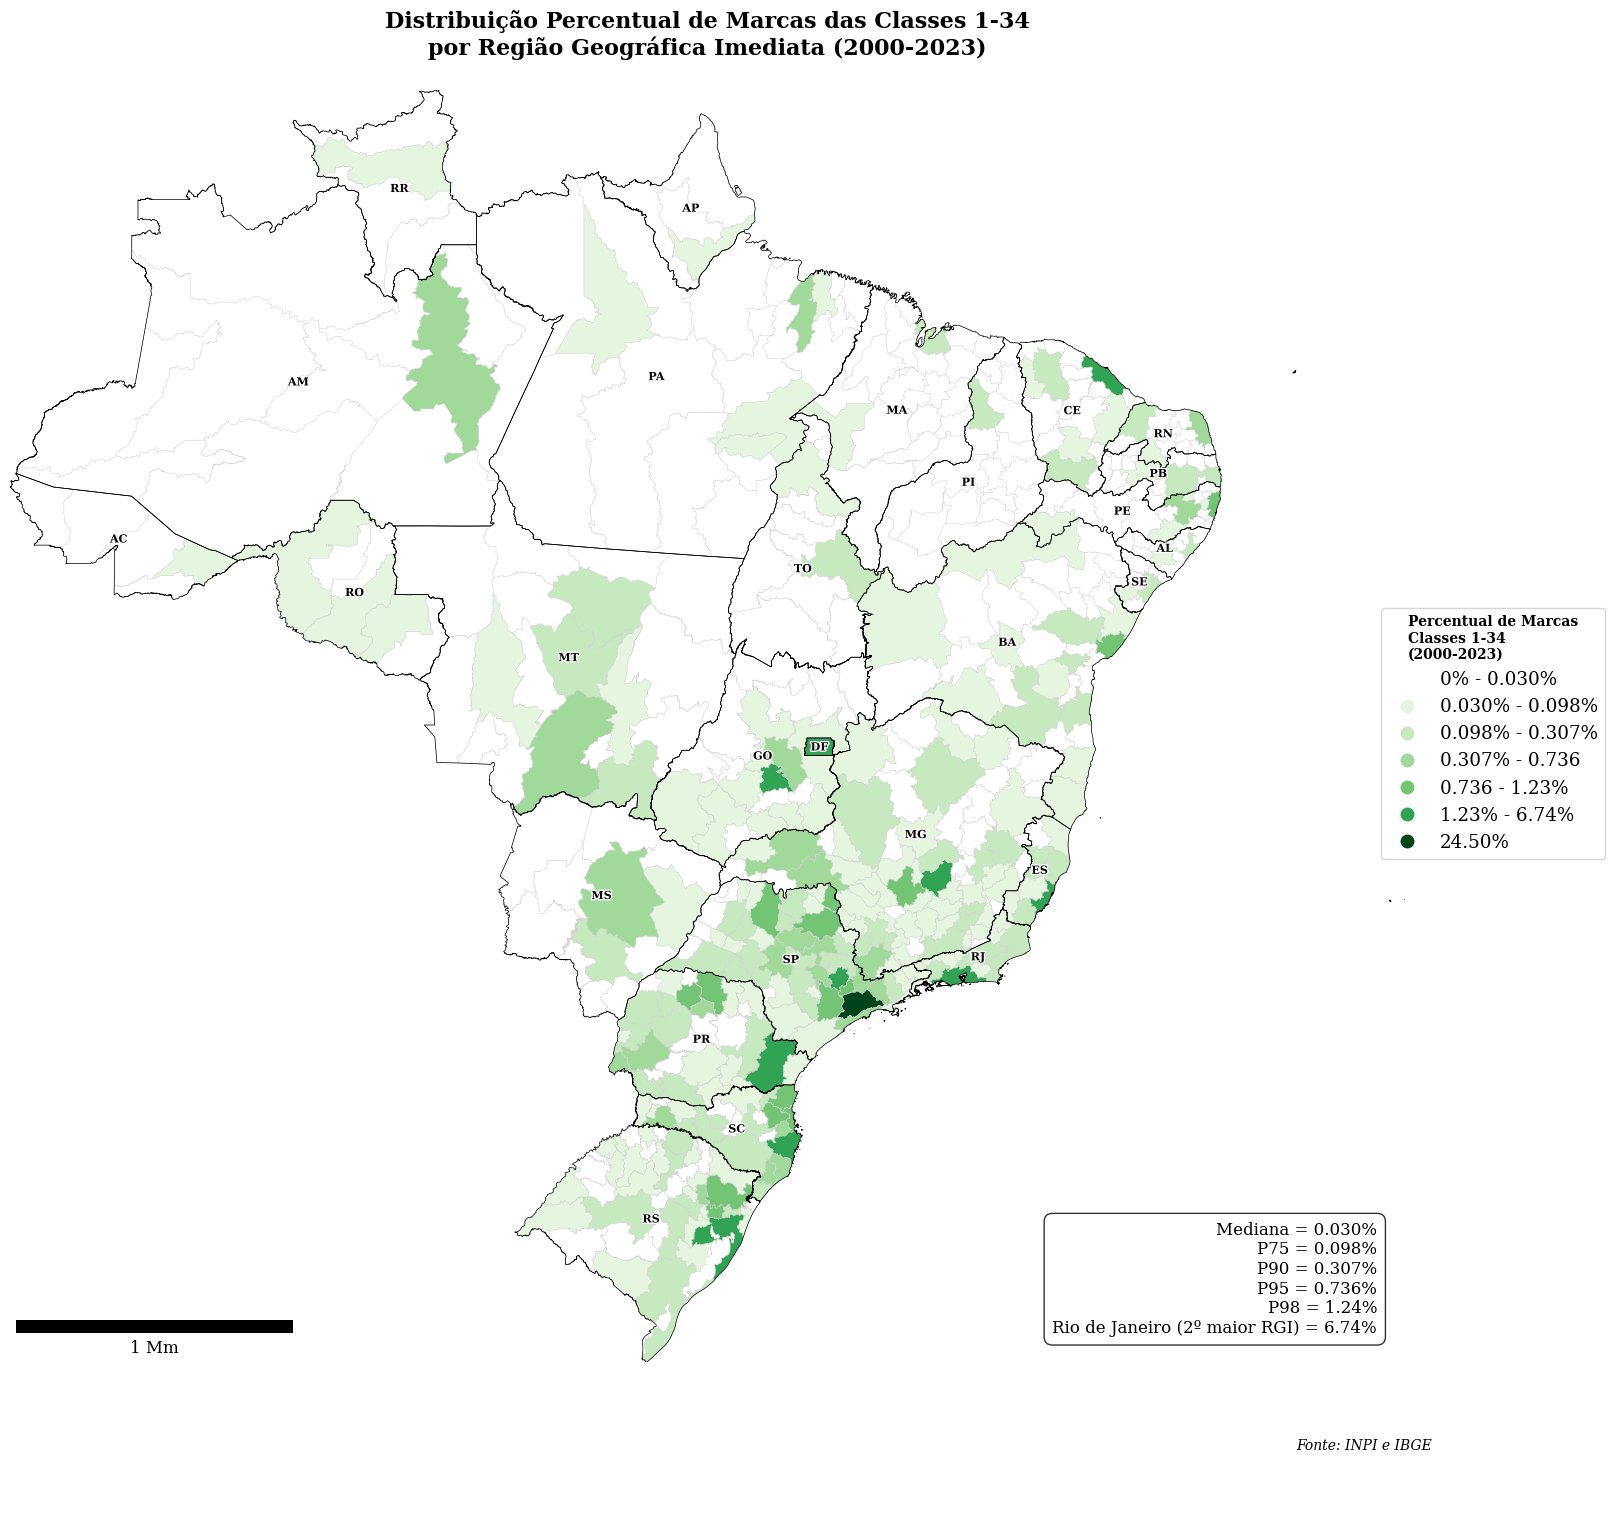

Estatísticas dos percentuais:
count    510.000000
mean       0.196078
std        1.175507
min        0.000178
25%        0.009238
50%        0.030201
75%        0.098199
max       24.491061
Name: percentual, dtype: float64

Distribuição por categoria percentual:
classe_pct
0% - 0.030%        252
0.030% - 0.098%    130
0.098% - 0.307%     77
0.307% - 0.736      25
0.736 - 1.23%       15
1.23% - 6.74%       10
24.50%               1
Name: count, dtype: int64


In [ ]:
#!pip install geopandas matplotlib contextily matplotlib-scalebar
# ====================
# 1. IMPORTAÇÕES
# ====================
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patheffects import withStroke
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx
import os
import numpy as np

# ====================
# 2. CONFIGURAÇÕES
# ====================
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.dpi': 300
})

# ====================
# 3. CARREGAR DADOS (AJUSTE OS CAMINHOS!)
# ====================
# Configurar caminhos
PATH_DADOS = "/content/drive/MyDrive/Mestrado UFMG/Dissertação/Shapefiles RGIs/"
PATH_DADOS_SAÍDA = "/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/[2025.02]/Dissertação/Análise de Dados/"
PATH_SHP_RGI = os.path.join(PATH_DADOS, "BR_RG_Imediatas_2024.shp")
PATH_SHP_ESTADOS = os.path.join(PATH_DADOS, "BR_UF_2024.shp")

# Carregar dados
dados = pd.read_csv("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/[2025.02]/Dissertação/Análise de Dados/2.BADEPI_Marcas_RGI.csv",
                encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")
rgi_geo = gpd.read_file(PATH_SHP_RGI)
estados = gpd.read_file(PATH_SHP_ESTADOS)

# ====================
# 4. FILTROS DE CLASSE
# ====================
# Selecione a classe desejada (ex: 35) ou intervalo (ex: range(35,46))
# CLASSE_SELECIONADA = 35  # Altere para a classe desejada
CLASSE_SELECIONADA = range(1, 35)  # Para intervalo de classes

# Aplicar filtro de classe
if isinstance(CLASSE_SELECIONADA, int):
    dados = dados[dados['CD_CLASSE_NICE'] == CLASSE_SELECIONADA]
elif isinstance(CLASSE_SELECIONADA, range):
    dados = dados[dados['CD_CLASSE_NICE'].isin(CLASSE_SELECIONADA)]

# ====================
# 5. PROCESSAMENTO
# ====================
# Converter CRS
rgi_geo = rgi_geo.to_crs(epsg=3857)
estados = estados.to_crs(epsg=3857)

# Converter para datetime
dados['DT_DEPOSITO'] = pd.to_datetime(dados['DT_DEPOSIT_PROCESS'], dayfirst=True, errors='coerce')

# Filtrar por intervalo de anos (2000-2023)
anos_selecionados = list(range(2000, 2024))
dados_filtrados = dados[dados['DT_DEPOSITO'].dt.year.isin(anos_selecionados)]

# Agregar marcas por RGI
df_marcas = dados_filtrados.groupby('cod_rgi', as_index=False).agg(
    total_marcas=('NO_PROCESS', 'nunique')
)

# Merge e tratamento
rgi_geo['CD_RGI'] = rgi_geo['CD_RGI'].astype(str).str.strip()
df_marcas['cod_rgi'] = df_marcas['cod_rgi'].astype(str).str.strip()
mapa_df = rgi_geo.merge(
    df_marcas,
    left_on='CD_RGI',
    right_on='cod_rgi',
    how='left'
).fillna({'total_marcas': 0})

# Calcular percentuais
total_geral = mapa_df['total_marcas'].sum()
mapa_df['percentual'] = (mapa_df['total_marcas'] / total_geral) * 100 if total_geral > 0 else 0

# ====================
# 6. CLASSIFICAÇÃO POR PERCENTUAL
# ====================
# Defina os intervalos percentuais desejados
classes_pct = [0, 0.030, 0.098, 0.307, 0.736, 1.23, 6.74, 24.50]
rotulos_pct = [
    '0% - 0.030%', '0.030% - 0.098%', '0.098% - 0.307%', '0.307% - 0.736', '0.736 - 1.23%', '1.23% - 6.74%', '24.50%'
]

# Classificar por percentual
mapa_df['classe_pct'] = pd.cut(
    mapa_df['percentual'],
    bins=classes_pct,
    labels=rotulos_pct,
    include_lowest=True,
    right=False
)

# ====================
# 7. PLOTAGEM DO MAPA
# ====================
fig, ax = plt.subplots(figsize=(18, 18))

# Cores e estilo
cores = ['#ffffff',  # branco
    '#e5f5e0',  # verde bem clarinho
    '#c7e9c0',  # verde claro
    '#a1d99b',  # verde médio-claro
    '#74c476',  # verde médio
    '#31a354',  # verde forte
    '#00441b'   # verde bem escuro
]
cmap = LinearSegmentedColormap.from_list('azul_sequencial', colors=cores, N=len(rotulos_pct))

# Plotar RGIs por percentual
mapa_df.plot(
    column='classe_pct',
    cmap=cmap,
    edgecolor='#d3d3d3',
    linewidth=0.3,
    legend=True,
    ax=ax,
    categorical=True,
    missing_kwds={'color': 'lightgrey'}
)

# Bordas dos estados
estados.boundary.plot(
    ax=ax,
    color='black',
    linewidth=0.5
)

# Nomes dos estados
for idx, row in estados.iterrows():
    centroid = row.geometry.centroid
    ax.text(
        centroid.x,
        centroid.y,
        row['SIGLA_UF'],
        ha='center',
        va='center',
        fontsize=8,
        color='black',
        weight='bold',
        path_effects=[withStroke(linewidth=2, foreground='white')]
    )

# Limitar a visualização ao território brasileiro
xmin, ymin, xmax, ymax = estados.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Elementos cartográficos
ax.add_artist(ScaleBar(dx=1, units='m', location='lower left', scale_loc='bottom', length_fraction=0.2))

# Legenda principal
legenda = ax.get_legend()
legenda.set_bbox_to_anchor((1.15, 0.6))
if isinstance(CLASSE_SELECIONADA, int):
    legenda.set_title(f'Percentual de Marcas\nClasse {CLASSE_SELECIONADA}\n(2000-2023)', prop={'size': 10, 'weight': 'bold'})
else:
    legenda.set_title(f'Percentual de Marcas\nClasses {CLASSE_SELECIONADA[0]}-{CLASSE_SELECIONADA[-1]}\n(2000-2023)', prop={'size': 10, 'weight': 'bold'})

# ==============================================
# LEGENDA DE CANTO COM ESTATÍSTICAS
# ==============================================
# Texto das estatísticas
stats_text = (
    "Mediana = 0.030%\n"
    "P75 = 0.098%\n"
    "P90 = 0.307%\n"
    "P95 = 0.736%\n"
    "P98 = 1.24%\n"
    "Rio de Janeiro (2º maior RGI) = 6.74%"
)

# Adicionar caixa de texto no canto inferior direito
ax.text(
    0.98, 0.02,  # Posição: 98% da largura, 2% da altura (canto inferior direito)
    stats_text,
    transform=ax.transAxes,  # Usar coordenadas relativas ao eixo
    fontsize=12,
    verticalalignment='bottom',
    horizontalalignment='right',
    bbox=dict(
        boxstyle='round',
        facecolor='white',
        alpha=0.8,
        edgecolor='black',
        pad=0.5
    )
)

# Título
if isinstance(CLASSE_SELECIONADA, int):
    titulo = f"Distribuição Percentual de Marcas da Classe {CLASSE_SELECIONADA}\npor Região Geográfica Imediata (2000-2023)"
else:
    titulo = f"Distribuição Percentual de Marcas das Classes {CLASSE_SELECIONADA[0]}-{CLASSE_SELECIONADA[-1]}\npor Região Geográfica Imediata (2000-2023)"

plt.title(
    titulo,
    fontsize=16,
    pad=25,
    weight='bold'
)

# Fonte
plt.annotate('Fonte: INPI e IBGE', xy=(0.72, 0.05), xycoords='figure fraction', fontsize=10, style='italic')

# ====================
# 8. SALVAR
# ====================
plt.axis('off')

if isinstance(CLASSE_SELECIONADA, int):
    nome_arquivo = f'mapa_percentual_classe_{CLASSE_SELECIONADA}_2000_2023.png'
else:
    nome_arquivo = f'mapa_percentual_classes_{CLASSE_SELECIONADA[0]}_{CLASSE_SELECIONADA[-1]}_2000_2023.png'

plt.savefig(
    os.path.join(PATH_DADOS_SAÍDA, nome_arquivo),
    bbox_inches='tight',
    pad_inches=0.3,
    dpi=300
)
plt.show()

# Estatísticas
print("Estatísticas dos percentuais:")
print(mapa_df['percentual'].describe())

# Contagem por categoria percentual
print("\nDistribuição por categoria percentual:")
print(mapa_df['classe_pct'].value_counts().sort_index())

### ESTATÍSTICA DESCRITIVA DETALHADA

In [ ]:
# =========================
# ANÁLISE DE DISTRIBUIÇÃO DE MARCAS POR REGIÃO GEOGRÁFICA IMEDIATA (RGI)
# =========================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# -------------------------
# CONFIGURAÇÕES GERAIS
# -------------------------
# Parâmetros ajustáveis
CLASSES_ANALISADAS = list(range(1, 35))  # Classes 1 a 45 (todas)
QUANTIL_CORTE = 0.99  # Quantil para limitar a visualização
NUM_BINS = 30         # Número de bins nos histogramas
PASTA_SAIDA = "analise_distribuicao_rgi_produto"
INCLUIR_ZEROS = True  # Incluir RGIs sem registros

# Configuração de estilo
plt.style.use('default')
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.2)

# Criar pasta de saída
os.makedirs(PASTA_SAIDA, exist_ok=True)

# -------------------------
# FUNÇÕES AUXILIARES (CORRIGIDAS)
# -------------------------
def preparar_dados(df, classes, incluir_zeros=False, gdf_rgi=None):
    """
    Prepara os dados para análise, calculando totais e percentuais por RGI e classe
    """
    # Garantir que as colunas são numéricas
    df = df.copy()
    df['CD_CLASSE_NICE'] = pd.to_numeric(df['CD_CLASSE_NICE'], errors='coerce')
    df['cod_rgi'] = pd.to_numeric(df['cod_rgi'], errors='coerce')

    # Filtrar apenas as classes de interesse
    df_filtrado = df[df['CD_CLASSE_NICE'].isin(classes)].copy()

    # Contagem de processos únicos por RGI e Classe
    contagem_por_classe = (
        df_filtrado
        .groupby(['cod_rgi', 'CD_CLASSE_NICE'])['NO_PROCESS']
        .nunique()
        .reset_index(name='total_processos')
    )

    # Contagem TOTAL por RGI
    contagem_total = (
        df_filtrado
        .groupby('cod_rgi')['NO_PROCESS']
        .nunique()
        .reset_index(name='total_processos')
    )
    contagem_total['CD_CLASSE_NICE'] = 'TOTAL'

    # Combinar as contagens
    contagem_final = pd.concat([contagem_por_classe, contagem_total], ignore_index=True)

    # Incluir RGIs com zero participação se solicitado
    if incluir_zeros and gdf_rgi is not None:
        universo_rgis = pd.DataFrame({'cod_rgi': gdf_rgi['cod_rgi'].astype(int).unique()})
        todas_classes = pd.DataFrame({'CD_CLASSE_NICE': classes + ['TOTAL']})

        # Produto cartesiano entre todas as RGIs e classes
        cart_prod = universo_rgis.assign(key=1).merge(
            todas_classes.assign(key=1), on='key'
        ).drop(columns='key')

        # Juntar com os dados existentes
        contagem_final = cart_prod.merge(
            contagem_final,
            on=['cod_rgi', 'CD_CLASSE_NICE'],
            how='left'
        ).fillna({'total_processos': 0})

    # Calcular percentual por classe
    contagem_final['percentual'] = contagem_final.groupby('CD_CLASSE_NICE')['total_processos'].transform(
        lambda x: 100 * x / x.sum() if x.sum() > 0 else 0
    )

    return contagem_final

def calcular_estatisticas(df):
    """
    Calcula estatísticas descritivas para cada classe
    """
    # Primeiro, agrupar por classe
    grouped = df.groupby('CD_CLASSE_NICE')['percentual']

    # Calcular as estatísticas para cada grupo
    estatisticas_list = []
    for classe, group in grouped:
        s = group.dropna()
        if len(s) == 0:
            # Se não há dados, preencher com NaN
            estatisticas_classe = {
                'CD_CLASSE_NICE': classe,
                'n_rgis': 0,
                'media': np.nan,
                'mediana': np.nan,
                'desvio_padrao': np.nan,
                'assimetria': np.nan,
                'curtose': np.nan,
                'p75': np.nan,
                'p90': np.nan,
                'p95': np.nan,
                'p97': np.nan,
                'p98': np.nan,
                'p99': np.nan,
                'maximo': np.nan,
                'soma': np.nan
            }
        else:
            estatisticas_classe = {
                'CD_CLASSE_NICE': classe,
                'n_rgis': len(s),
                'media': s.mean(),
                'mediana': s.median(),
                'desvio_padrao': s.std(),
                'assimetria': s.skew(),
                'curtose': s.kurtosis(),
                'p75': s.quantile(0.75),
                'p90': s.quantile(0.90),
                'p95': s.quantile(0.95),
                'p97': s.quantile(0.97),
                'p98': s.quantile(0.98),
                'p99': s.quantile(0.99),
                'maximo': s.max(),
                'soma': s.sum()
            }
        estatisticas_list.append(estatisticas_classe)

    estatisticas = pd.DataFrame(estatisticas_list)
    return estatisticas

def plot_distribuicao(df, classe, pasta_saida, q_corte=0.99, bins=30):
    """
    Gera e salva gráfico de distribuição para uma classe específica
    """
    # Filtrar dados para a classe
    dados_classe = df[df['CD_CLASSE_NICE'] == classe].copy()
    dados_classe = dados_classe[~dados_classe['percentual'].isna()]

    if dados_classe.empty:
        print(f"[Aviso] Classe {classe}: sem dados para plotar.")
        return

    # Calcular estatísticas
    x_max = dados_classe['percentual'].quantile(q_corte)
    n_cauda = (dados_classe['percentual'] > x_max).sum()
    mediana = dados_classe['percentual'].median()
    p75 = dados_classe['percentual'].quantile(0.75)

    # Criar figura com subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # Histograma
    ax1.hist(dados_classe['percentual'], bins=bins, range=(0, x_max),
             edgecolor='black', alpha=0.7)
    ax1.axvline(mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana: {mediana:.3f}%')
    ax1.axvline(p75, color='green', linestyle=':', linewidth=2, label=f'P75: {p75:.3f}%')
    ax1.set_xlabel('Participação por RGI (%)')
    ax1.set_ylabel('Frequência (RGIs)')
    ax1.set_title(f'Distribuição - Classe {classe}')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Boxplot
    sns.boxplot(y=dados_classe['percentual'], ax=ax2)
    ax2.set_ylabel('Participação por RGI (%)')
    ax2.set_title(f'Boxplot - Classe {classe}')

    # Informações no gráfico
    fig.suptitle(f'Distribuição das Participações por RGI - Classe {classe}\n'
                f'Faixa exibida: 0–p{int(q_corte*100)} ({x_max:.3f}%). '
                f'RGIs acima do limite: {n_cauda}', fontsize=14)

    plt.tight_layout()

    # Salvar figura
    nome_arquivo = os.path.join(pasta_saida, f"distribuicao_classe_{classe}.png")
    plt.savefig(nome_arquivo, dpi=200, bbox_inches='tight')
    plt.close()

    print(f"Gráfico salvo: {nome_arquivo}")

    return fig

def plot_comparacao_classes(df, classes, pasta_saida):
    """
    Gera gráfico comparativo entre todas as classes
    """
    # Filtrar apenas as classes desejadas
    dados_comparacao = df[df['CD_CLASSE_NICE'].isin(classes)].copy()

    # Criar figura
    plt.figure(figsize=(14, 8))

    # Boxplot comparativo
    sns.boxplot(x='CD_CLASSE_NICE', y='percentual', data=dados_comparacao)
    plt.xlabel('Classe')
    plt.ylabel('Participação por RGI (%)')
    plt.title('Comparação da Distribuição de Participações por Classe')
    plt.xticks(rotation=45)
    plt.grid(True, alpha=0.3)

    # Salvar figura
    nome_arquivo = os.path.join(pasta_saida, "comparacao_classes.png")
    plt.savefig(nome_arquivo, dpi=200, bbox_inches='tight')
    plt.close()

    print(f"Gráfico comparativo salvo: {nome_arquivo}")

def analisar_concentracao(df, classe, top_n=10):
    """
    Analisa o nível de concentração das marcas por RGI
    """
    dados_classe = df[df['CD_CLASSE_NICE'] == classe].copy()
    dados_classe = dados_classe.sort_values('percentual', ascending=False)

    # Calcular métricas de concentração
    total = dados_classe['percentual'].sum()
    top_10 = dados_classe.head(10)['percentual'].sum()
    top_20 = dados_classe.head(20)['percentual'].sum()

    # Calcular índice de Herfindahl-Hirschman (HHI)
    hhi = (dados_classe['percentual'] ** 2).sum()

    # Resultados
    resultado = {
        'classe': classe,
        'total_rgis': len(dados_classe),
        'concentracao_top10': top_10,
        'concentracao_top20': top_20,
        'indice_hhi': hhi,
        'interpretacao_hhi': interpretar_hhi(hhi)
    }

    # Top N RGIs
    top_rgis = dados_classe.head(top_n).copy()

    return resultado, top_rgis

def interpretar_hhi(hhi):
    """
    Interpreta o índice HHI de acordo com guidelines padrão
    """
    if hhi < 1500:
        return "Baixa concentração"
    elif hhi < 2500:
        return "Média concentração"
    else:
        return "Alta concentração"

# -------------------------
# EXECUÇÃO PRINCIPAL (CORRIGIDA)
# -------------------------
def main():
    """
    Função principal que executa toda a análise
    """
    print("Iniciando análise de distribuição de marcas por RGI...")

    # 1. Preparar os dados
    print("Preparando dados...")
    dados_preparados = preparar_dados(df, CLASSES_ANALISADAS, INCLUIR_ZEROS)

    # 2. Calcular estatísticas descritivas
    print("Calculando estatísticas...")
    estatisticas = calcular_estatisticas(dados_preparados)

    # Salvar estatísticas
    caminho_estatisticas = os.path.join(PASTA_SAIDA, "estatisticas_detalhadas.csv")
    estatisticas.to_csv(caminho_estatisticas, index=False, encoding='utf-8')
    print(f"Estatísticas salvas: {caminho_estatisticas}")

    # 3. Gerar gráficos individuais para cada classe
    print("Gerando gráficos individuais...")
    classes_para_plotar = ['TOTAL'] + CLASSES_ANALISADAS

    for classe in classes_para_plotar:
        plot_distribuicao(dados_preparados, classe, PASTA_SAIDA, QUANTIL_CORTE, NUM_BINS)

    # 4. Gerar gráfico comparativo
    print("Gerando gráfico comparativo...")
    plot_comparacao_classes(dados_preparados, CLASSES_ANALISADAS, PASTA_SAIDA)

    # 5. Analisar concentração por classe
    print("Analisando concentração...")
    resultados_concentracao = []
    tops_concentracao = {}

    for classe in classes_para_plotar:
        resultado, top_rgis = analisar_concentracao(dados_preparados, classe)
        resultados_concentracao.append(resultado)
        tops_concentracao[classe] = top_rgis

        # Salvar top RGIs por classe
        caminho_top = os.path.join(PASTA_SAIDA, f"top_rgis_classe_{classe}.csv")
        top_rgis.to_csv(caminho_top, index=False, encoding='utf-8')

    # Salvar resultados de concentração
    df_concentracao = pd.DataFrame(resultados_concentracao)
    caminho_concentracao = os.path.join(PASTA_SAIDA, "analise_concentracao.csv")
    df_concentracao.to_csv(caminho_concentracao, index=False, encoding='utf-8')
    print(f"Análise de concentração salva: {caminho_concentracao}")

    # 6. Gerar relatório resumido (CORRIGIDO)
    print("Gerando relatório resumido...")

    # Verificar se as colunas existem antes de acessá-las
    colunas_necessarias = ['CD_CLASSE_NICE', 'n_rgis', 'media', 'mediana', 'maximo']
    colunas_existentes = [col for col in colunas_necessarias if col in estatisticas.columns]

    if len(colunas_existentes) != len(colunas_necessarias):
        print(f"Aviso: Nem todas as colunas necessárias estão presentes no DataFrame de estatísticas.")
        print(f"Colunas existentes: {list(estatisticas.columns)}")
        print(f"Colunas necessárias: {colunas_necessarias}")

    with open(os.path.join(PASTA_SAIDA, "relatorio_analise.txt"), "w") as f:
        f.write("RELATÓRIO DE ANÁLISE DE DISTRIBUIÇÃO DE MARCAS POR RGI\n")
        f.write("=" * 60 + "\n\n")

        f.write(f"Classes analisadas: {CLASSES_ANALISADAS}\n")
        f.write(f"Total de RGIs consideradas: {len(dados_preparados['cod_rgi'].unique())}\n")
        f.write(f"Quantil de corte para visualização: {QUANTIL_CORTE}\n")
        f.write(f"Incluir RGIs com zero marcas: {INCLUIR_ZEROS}\n\n")

        f.write("ESTATÍSTICAS GERAIS:\n")
        for _, row in estatisticas.iterrows():
            # Verificar se as colunas existem antes de acessá-las
            classe = row['CD_CLASSE_NICE'] if 'CD_CLASSE_NICE' in estatisticas.columns else 'N/A'
            n_rgis = row['n_rgis'] if 'n_rgis' in estatisticas.columns else 'N/A'
            media = row['media'] if 'media' in estatisticas.columns else 'N/A'
            mediana = row['mediana'] if 'mediana' in estatisticas.columns else 'N/A'
            maximo = row['maximo'] if 'maximo' in estatisticas.columns else 'N/A'

            f.write(f"\nClasse {classe}:\n")
            f.write(f"  - RGIs: {n_rgis}\n")
            f.write(f"  - Média: {media:.4f}%\n")
            f.write(f"  - Mediana: {mediana:.4f}%\n")
            f.write(f"  - Máximo: {maximo:.4f}%\n")

        f.write("\nANÁLISE DE CONCENTRAÇÃO:\n")
        for resultado in resultados_concentracao:
            f.write(f"\nClasse {resultado['classe']}:\n")
            f.write(f"  - Concentração top 10 RGIs: {resultado['concentracao_top10']:.2f}%\n")
            f.write(f"  - Índice HHI: {resultado['indice_hhi']:.2f} ({resultado['interpretacao_hhi']})\n")

    print("Análise concluída! Verifique os arquivos na pasta:", PASTA_SAIDA)

# -------------------------
# EXECUTAR ANÁLISE
# -------------------------
if __name__ == "__main__":
    # Certifique-se de que o DataFrame df está disponível
    # Se necessário, carregue os dados aqui
    main()

Iniciando análise de distribuição de marcas por RGI...
Preparando dados...
Calculando estatísticas...
Estatísticas salvas: analise_distribuicao_rgi_produto/estatisticas_detalhadas.csv
Gerando gráficos individuais...
Gráfico salvo: analise_distribuicao_rgi_produto/distribuicao_classe_TOTAL.png
Gráfico salvo: analise_distribuicao_rgi_produto/distribuicao_classe_1.png
Gráfico salvo: analise_distribuicao_rgi_produto/distribuicao_classe_2.png
Gráfico salvo: analise_distribuicao_rgi_produto/distribuicao_classe_3.png
Gráfico salvo: analise_distribuicao_rgi_produto/distribuicao_classe_4.png
Gráfico salvo: analise_distribuicao_rgi_produto/distribuicao_classe_5.png
Gráfico salvo: analise_distribuicao_rgi_produto/distribuicao_classe_6.png
Gráfico salvo: analise_distribuicao_rgi_produto/distribuicao_classe_7.png
Gráfico salvo: analise_distribuicao_rgi_produto/distribuicao_classe_8.png
Gráfico salvo: analise_distribuicao_rgi_produto/distribuicao_classe_9.png
Gráfico salvo: analise_distribuicao_rgi_

### ÍNDICE GINI

In [ ]:
# Cálculo do Índice de Gini para distribuição de marcas por RGI
import numpy as np

# Preparar os dados
gini_data = mapa_df[['NM_RGI', 'total_marcas']].copy()
gini_data = gini_data.sort_values('total_marcas').reset_index(drop=True)

# Calcular totais
total_marcas = gini_data['total_marcas'].sum()
total_rgis = len(gini_data)

# Calcular proporções acumuladas
gini_data['proporcao_acumulada_marcas'] = gini_data['total_marcas'].cumsum() / total_marcas
gini_data['proporcao_acumulada_rgis'] = (gini_data.index + 1) / total_rgis

# Adicionar ponto inicial (0,0)
proporcao_rgis = np.concatenate(([0], gini_data['proporcao_acumulada_rgis']))
proporcao_marcas = np.concatenate(([0], gini_data['proporcao_acumulada_marcas']))

# Calcular área sob a curva de Lorenz usando o método do trapézio
area_sob_curva = np.trapz(proporcao_marcas, proporcao_rgis)

# Calcular Índice de Gini
indice_gini = 1 - 2 * area_sob_curva

print(f"Índice de Gini da distribuição de marcas por RGI: {indice_gini:.4f}")


Índice de Gini da distribuição de marcas por RGI: 0.8473


### Evolução Temporal de Marcas

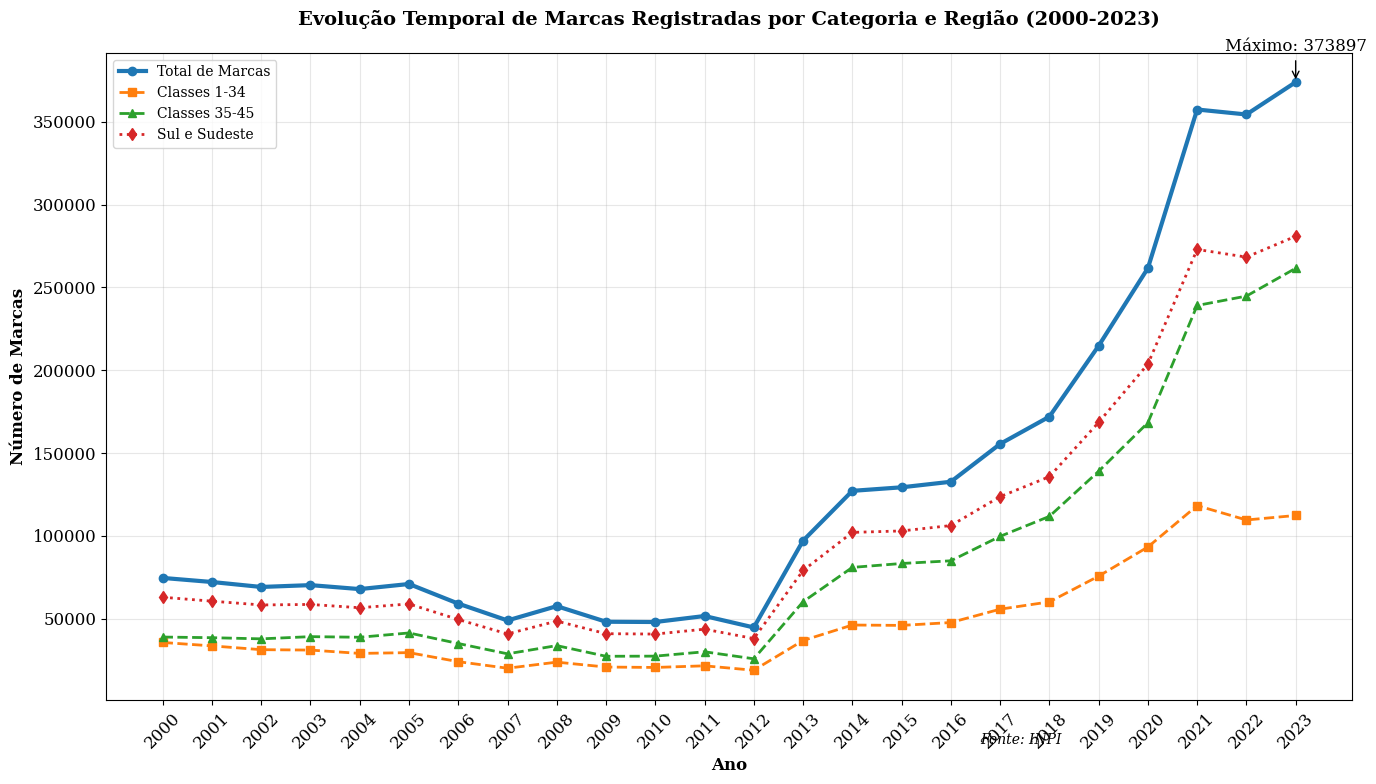

ESTATÍSTICAS DESCRITIVAS (2000-2023):
Total de marcas no período: 3,159,496
Média anual de marcas: 131646
Ano com maior número de marcas: 2023 (373897 marcas)
Proporção média de classes 1-34: 36.2%
Proporção média de classes 35-45: 63.8%
Proporção média do Sul e Sudeste: 79.2%
Taxa de crescimento média anual: 9.8%
Dados salvos em /content/drive/MyDrive/Mestrado UFMG/Dissertação/Shapefiles RGIs/dados_evolucao_temporal.xlsx


In [ ]:
!pip install geopandas matplotlib contextily matplotlib-scalebar
# ====================
# 1. IMPORTAÇÕES
# ====================
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patheffects import withStroke
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx
import os
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# ====================
# 2. CONFIGURAÇÕES
# ====================
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.dpi': 300
})

# ====================
# 3. CARREGAR DADOS (AJUSTE OS CAMINHOS!)
# ====================
# Configurar caminhos
PATH_DADOS = "/content/drive/MyDrive/Mestrado UFMG/Dissertação/Shapefiles RGIs/"
PATH_SHP_RGI = os.path.join(PATH_DADOS, "BR_RG_Imediatas_2024.shp")
PATH_SHP_ESTADOS = os.path.join(PATH_DADOS, "BR_UF_2024.shp")
#PATH_CSV_MARCAS = os.path.join(PATH_DADOS, "badepi_mrc_atualizada_rgi.csv")

# Carregar dados
dados = pd.read_csv("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/[2025.02]/Dissertação/Análise de Dados/2.BADEPI_Marcas_RGI.csv",
                encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")


# Converter para datetime
dados['DT_DEPOSITO'] = pd.to_datetime(dados['DT_DEPOSIT_PROCESS'], dayfirst=True, errors='coerce')

# ====================
# 4. PREPARAR DADOS PARA ANÁLISE TEMPORAL
# ====================
# Extrair ano da data de depósito
dados['ANO'] = dados['DT_DEPOSITO'].dt.year

# Filtrar anos válidos (2000-2023)
dados = dados[(dados['ANO'] >= 2000) & (dados['ANO'] <= 2023)]

# Criar categorias de classes
dados['CATEGORIA_CLASSE'] = 'Outras'
dados.loc[dados['CD_CLASSE_NICE'].between(1, 34), 'CATEGORIA_CLASSE'] = 'Classes 1-34'
dados.loc[dados['CD_CLASSE_NICE'].between(35, 45), 'CATEGORIA_CLASSE'] = 'Classes 35-45'

# Identificar regiões Sul e Sudeste (códigos que começam com 31, 32, 33, 35, 41, 42, 43)
codigos_sul_sudeste = ['31', '32', '33', '35', '41', '42', '43']
dados['REGIAO'] = 'Outras regiões'
dados.loc[dados['cod_rgi'].astype(str).str[:2].isin(codigos_sul_sudeste), 'REGIAO'] = 'Sul e Sudeste'

# ====================
# 5. AGRUPAR DADOS POR ANO
# ====================
# Total por ano
total_ano = dados.groupby('ANO').size().reset_index(name='TOTAL')

# Por categoria de classe
classes_ano = dados.groupby(['ANO', 'CATEGORIA_CLASSE']).size().reset_index(name='COUNT')
classes_ano = classes_ano.pivot(index='ANO', columns='CATEGORIA_CLASSE', values='COUNT').reset_index()
classes_ano = classes_ano.fillna(0)

# Por região
regiao_ano = dados.groupby(['ANO', 'REGIAO']).size().reset_index(name='COUNT')
regiao_ano = regiao_ano.pivot(index='ANO', columns='REGIAO', values='COUNT').reset_index()
regiao_ano = regiao_ano.fillna(0)

# Combinar todos os dados
dados_ano = total_ano.merge(classes_ano, on='ANO', how='left')
dados_ano = dados_ano.merge(regiao_ano, on='ANO', how='left')

# Preencher valores NaN com 0
dados_ano = dados_ano.fillna(0)

# ====================
# 6. CRIAR GRÁFICO DE LINHA TEMPORAL
# ====================
fig, ax = plt.subplots(figsize=(14, 8))

# Plotar as séries
ax.plot(dados_ano['ANO'], dados_ano['TOTAL'],
        label='Total de Marcas', linewidth=3, color='#1f77b4', marker='o')

ax.plot(dados_ano['ANO'], dados_ano['Classes 1-34'],
        label='Classes 1-34', linewidth=2, color='#ff7f0e', linestyle='--', marker='s')

ax.plot(dados_ano['ANO'], dados_ano['Classes 35-45'],
        label='Classes 35-45', linewidth=2, color='#2ca02c', linestyle='--', marker='^')

ax.plot(dados_ano['ANO'], dados_ano['Sul e Sudeste'],
        label='Sul e Sudeste', linewidth=2, color='#d62728', linestyle=':', marker='d')

# Configurações do gráfico
ax.set_xlabel('Ano', fontsize=12, weight='bold')
ax.set_ylabel('Número de Marcas', fontsize=12, weight='bold')
ax.set_title('Evolução Temporal de Marcas Registradas por Categoria e Região (2000-2023)',
             fontsize=14, pad=20, weight='bold')

# Adicionar grade
ax.grid(True, alpha=0.3)

# Adicionar legenda
ax.legend(loc='upper left', fontsize=10)

# Formatar eixos
ax.set_xticks(dados_ano['ANO'])
ax.tick_params(axis='x', rotation=45)

# Adicionar anotações para pontos importantes
max_total = dados_ano['TOTAL'].max()
max_year = dados_ano.loc[dados_ano['TOTAL'].idxmax(), 'ANO']
ax.annotate(f'Máximo: {max_total}',
            xy=(max_year, max_total),
            xytext=(max_year, max_total + max_total * 0.05),
            arrowprops=dict(arrowstyle='->', color='black'),
            ha='center')

# Adicionar fonte
plt.annotate('Fonte: INPI', xy=(0.7, 0.05), xycoords='figure fraction', fontsize=10, style='italic')

# Ajustar layout
plt.tight_layout()

# Salvar gráfico
plt.savefig(
    os.path.join(PATH_DADOS, 'evolucao_temporal_marcas.png'),
    bbox_inches='tight',
    pad_inches=0.3,
    dpi=300
)

plt.show()

# ====================
# 7. ESTATÍSTICAS DESCRITIVAS
# ====================
print("ESTATÍSTICAS DESCRITIVAS (2000-2023):")
print("=" * 50)
print(f"Total de marcas no período: {dados_ano['TOTAL'].sum():,}")
print(f"Média anual de marcas: {dados_ano['TOTAL'].mean():.0f}")
print(f"Ano com maior número de marcas: {max_year} ({max_total} marcas)")
print(f"Proporção média de classes 1-34: {(dados_ano['Classes 1-34'].sum() / dados_ano['TOTAL'].sum() * 100):.1f}%")
print(f"Proporção média de classes 35-45: {(dados_ano['Classes 35-45'].sum() / dados_ano['TOTAL'].sum() * 100):.1f}%")
print(f"Proporção média do Sul e Sudeste: {(dados_ano['Sul e Sudeste'].sum() / dados_ano['TOTAL'].sum() * 100):.1f}%")

# Calcular taxa de crescimento anual
dados_ano['CRESCIMENTO_ANUAL'] = dados_ano['TOTAL'].pct_change() * 100
crescimento_medio = dados_ano['CRESCIMENTO_ANUAL'].mean()
print(f"Taxa de crescimento média anual: {crescimento_medio:.1f}%")

# ====================
# 8. SALVAR DADOS EM EXCEL
# ====================
with pd.ExcelWriter(os.path.join(PATH_DADOS, 'dados_evolucao_temporal.xlsx')) as writer:
    dados_ano.to_excel(writer, sheet_name='Dados Anuais', index=False)

    # Estatísticas descritivas
    stats = pd.DataFrame({
        'Métrica': [
            'Total de Marcas (2000-2023)',
            'Média Anual',
            'Desvio Padrão Anual',
            'Ano com Mais Marcas',
            'Máximo de Marcas em um Ano',
            'Proporção Classes 1-34',
            'Proporção Classes 35-45',
            'Proporção Sul e Sudeste',
            'Taxa de Crescimento Média Anual'
        ],
        'Valor': [
            dados_ano['TOTAL'].sum(),
            dados_ano['TOTAL'].mean(),
            dados_ano['TOTAL'].std(),
            max_year,
            max_total,
            f"{(dados_ano['Classes 1-34'].sum() / dados_ano['TOTAL'].sum() * 100):.1f}%",
            f"{(dados_ano['Classes 35-45'].sum() / dados_ano['TOTAL'].sum() * 100):.1f}%",
            f"{(dados_ano['Sul e Sudeste'].sum() / dados_ano['TOTAL'].sum() * 100):.1f}%",
            f"{crescimento_medio:.1f}%"
        ]
    })
    stats.to_excel(writer, sheet_name='Estatísticas', index=False)

print(f"Dados salvos em {os.path.join(PATH_DADOS, 'dados_evolucao_temporal.xlsx')}")

### PF E PJ

Valores únicos em CD_TIPO_PFPJ antes do filtro:
['J' 'F' nan]
Quantidade de NaN em CD_TIPO_PFPJ: 3574
Valores únicos em CD_TIPO_PFPJ após o filtro:
['J' 'F']
Quantidade de registros após filtrar NaN: 3155923


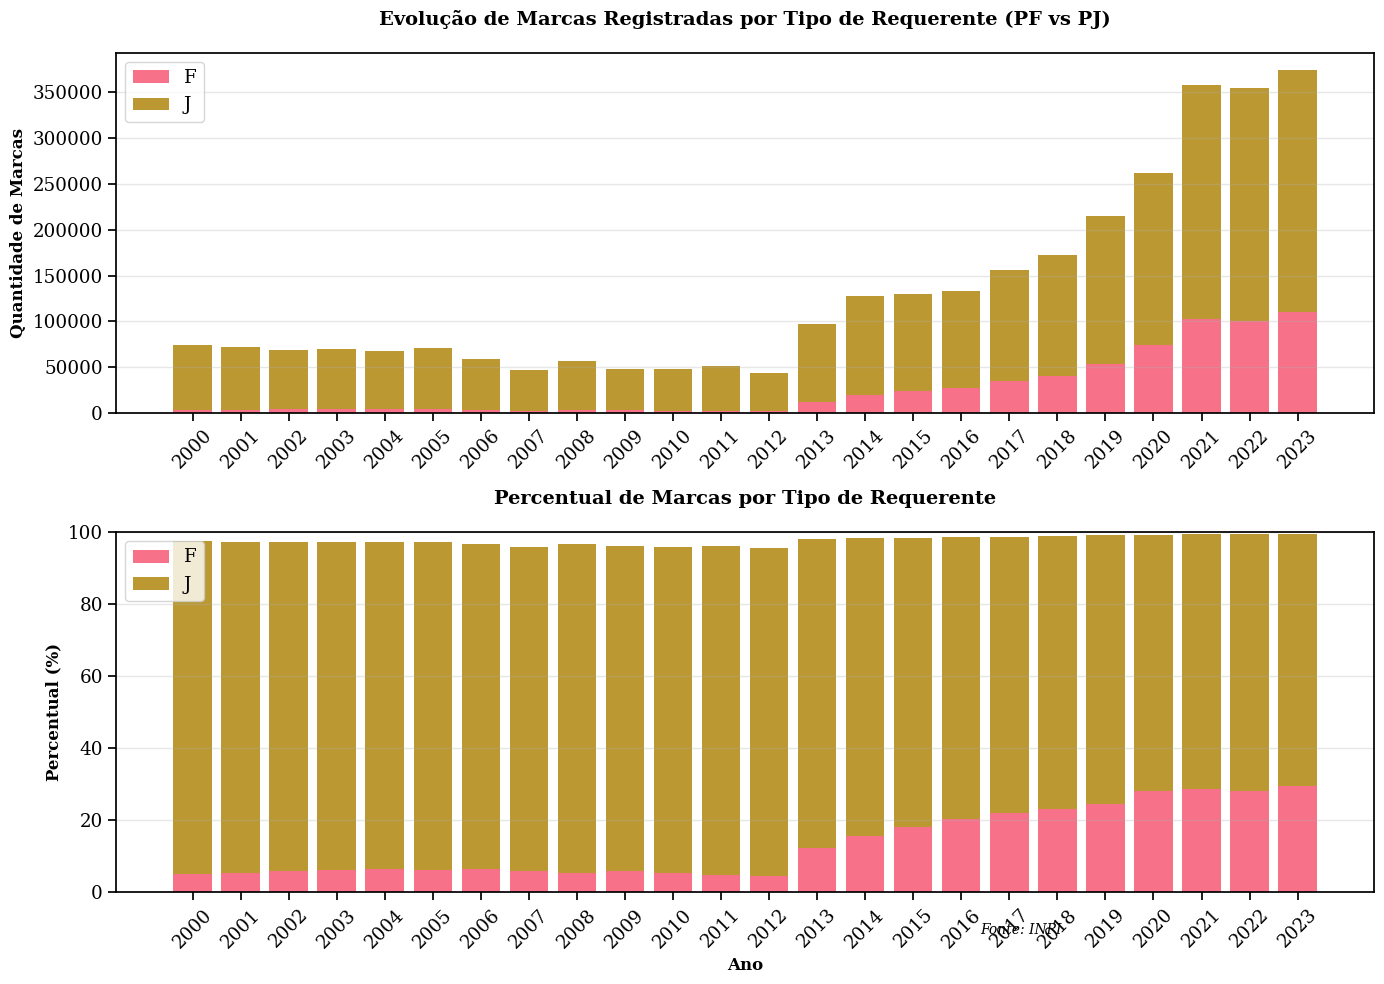

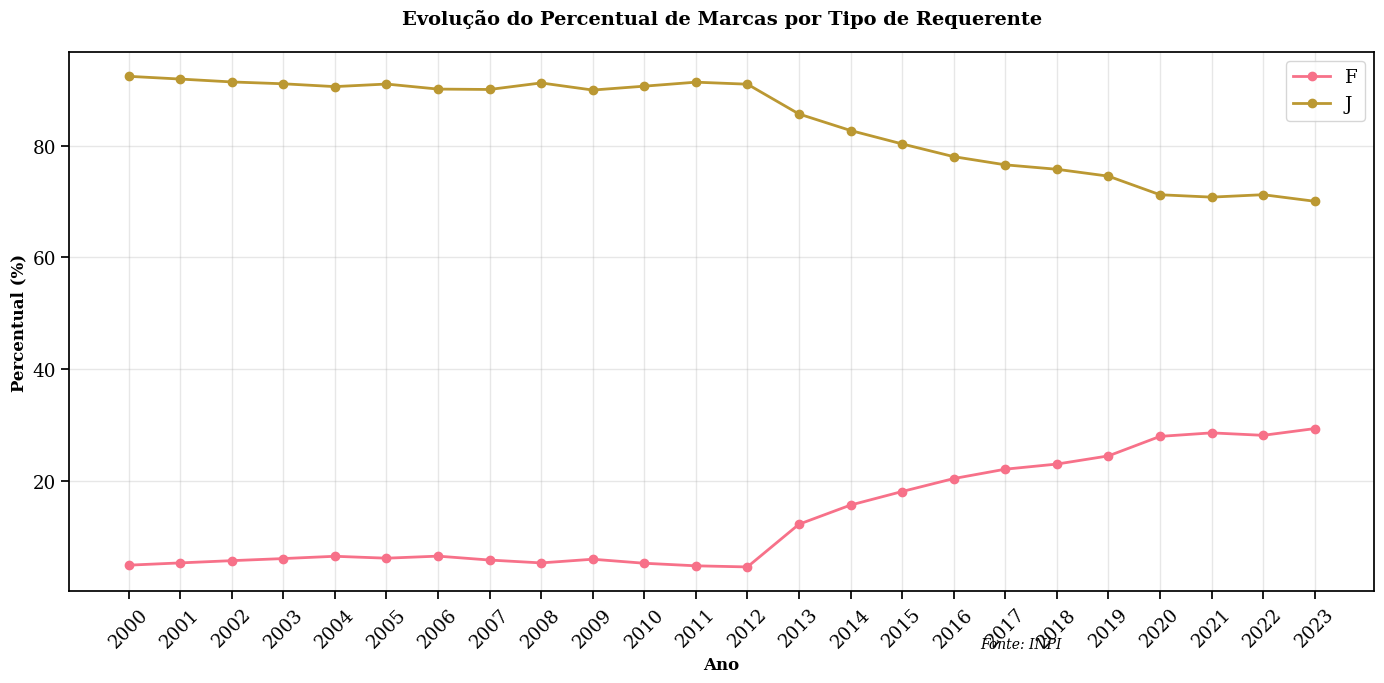

ESTATÍSTICAS DESCRITIVAS - PF vs PJ (2000-2023):
Total de marcas no período: 3,204,198
Total de marcas F: 646,626 (20.2%)
Total de marcas J: 2,509,296 (78.3%)

Evolução dos percentuais médios:
Percentual médio de F: 13.5%
Percentual médio de J: 84.1%
\Comparativo 2000 vs 2023:
F: 5.0% → 29.4% (variação: +24.4%)
J: 92.4% → 70.0% (variação: -22.3%)


In [ ]:
# !pip install geopandas matplotlib contextily matplotlib-scalebar
# ====================
# 1. IMPORTAÇÕES
# ====================
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patheffects import withStroke
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx
import os
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# ====================
# 2. CONFIGURAÇÕES
# ====================
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.dpi': 300
})

# ====================
# 3. CARREGAR DADOS (AJUSTE OS CAMINHOS!)
# ====================
# Configurar caminhos
PATH_DADOS = "/content/drive/MyDrive/Mestrado UFMG/Dissertação/Shapefiles RGIs/"
PATH_SHP_RGI = os.path.join(PATH_DADOS, "BR_RG_Imediatas_2024.shp")
PATH_SHP_ESTADOS = os.path.join(PATH_DADOS, "BR_UF_2024.shp")
#PATH_CSV_MARCAS = os.path.join(PATH_DADOS, "badepi_mrc_atualizada_rgi.csv")

# Carregar dados
dados = pd.read_csv("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/[2025.02]/Dissertação/Análise de Dados/2.BADEPI_Marcas_RGI.csv",
                encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")

# Converter para datetime
dados['DT_DEPOSITO'] = pd.to_datetime(dados['DT_DEPOSIT_PROCESS'], dayfirst=True, errors='coerce')

# ====================
# 4. FILTRAR VALORES NaN EM CD_TIPO_PFPJ
# ====================
# Verificar se a coluna existe
if 'CD_TIPO_PFPJ' in dados.columns:
    print(f"Valores únicos em CD_TIPO_PFPJ antes do filtro:")
    print(dados['CD_TIPO_PFPJ'].unique())
    print(f"Quantidade de NaN em CD_TIPO_PFPJ: {dados['CD_TIPO_PFPJ'].isna().sum()}")

    # Filtrar valores NaN
    dados = dados.dropna(subset=['CD_TIPO_PFPJ'])

    print(f"Valores únicos em CD_TIPO_PFPJ após o filtro:")
    print(dados['CD_TIPO_PFPJ'].unique())
    print(f"Quantidade de registros após filtrar NaN: {len(dados)}")
else:
    print("Coluna CD_TIPO_PFPJ não encontrada no dataset")
    # Se a coluna não existir, vamos criar uma dummy para não quebrar o código
    dados['CD_TIPO_PFPJ'] = 'Desconhecido'


# Aplicar mapeamento ou usar valores originais se não houver mapeamento
if 'CD_TIPO_PFPJ' in dados.columns:
    dados['TIPO_PFPJ'] = dados['CD_TIPO_PFPJ'].map(tipo_pfpj_map).fillna(dados['CD_TIPO_PFPJ'])
else:
    print("Coluna CD_TIPO_PFPJ não encontrada no dataset")
    # Se a coluna não existir, vamos criar uma dummy para não quebrar o código
    dados['TIPO_PFPJ'] = 'Desconhecido'

# Extrair ano da data de depósito
dados['ANO'] = dados['DT_DEPOSITO'].dt.year

# Filtrar anos válidos (2000-2023)
dados = dados[(dados['ANO'] >= 2000) & (dados['ANO'] <= 2023)]

# Agrupar por ano e tipo PF/PJ
pfpj_ano = dados.groupby(['ANO', 'TIPO_PFPJ']).size().reset_index(name='COUNT')
pfpj_pivot = pfpj_ano.pivot(index='ANO', columns='TIPO_PFPJ', values='COUNT').reset_index()

# Preencher valores NaN com 0
pfpj_pivot = pfpj_pivot.fillna(0)

# Calcular totais anuais
pfpj_pivot['TOTAL'] = pfpj_pivot.sum(axis=1, numeric_only=True)

# Calcular percentuais
for col in pfpj_pivot.columns:
    if col not in ['ANO', 'TOTAL']:
        pfpj_pivot[f'% {col}'] = (pfpj_pivot[col] / pfpj_pivot['TOTAL']) * 100

# ====================
# 5. GRÁFICO DE BARRAS EMPILHADAS (PF vs PJ)
# ====================
# Preparar dados para o gráfico
anos = pfpj_pivot['ANO']
categorias = [col for col in pfpj_pivot.columns if col not in ['ANO', 'TOTAL'] and not col.startswith('%')]

# Criar gráfico de barras empilhadas
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Gráfico 1: Quantidade absoluta
bottom = np.zeros(len(anos))
for categoria in categorias:
    ax1.bar(anos, pfpj_pivot[categoria], bottom=bottom, label=categoria)
    bottom += pfpj_pivot[categoria]

ax1.set_ylabel('Quantidade de Marcas', fontsize=12, weight='bold')
ax1.set_title('Evolução de Marcas Registradas por Tipo de Requerente (PF vs PJ)', fontsize=14, pad=20, weight='bold')
ax1.legend(loc='upper left')
ax1.grid(True, alpha=0.3, axis='y')
ax1.set_xticks(anos)
ax1.tick_params(axis='x', rotation=45)

# Gráfico 2: Percentual
bottom_pct = np.zeros(len(anos))
for categoria in categorias:
    ax2.bar(anos, pfpj_pivot[f'% {categoria}'], bottom=bottom_pct, label=categoria)
    bottom_pct += pfpj_pivot[f'% {categoria}']

ax2.set_xlabel('Ano', fontsize=12, weight='bold')
ax2.set_ylabel('Percentual (%)', fontsize=12, weight='bold')
ax2.set_title('Percentual de Marcas por Tipo de Requerente', fontsize=14, pad=20, weight='bold')
ax2.legend(loc='upper left')
ax2.grid(True, alpha=0.3, axis='y')
ax2.set_ylim(0, 100)
ax2.set_xticks(anos)
ax2.tick_params(axis='x', rotation=45)

# Adicionar fonte
plt.annotate('Fonte: INPI', xy=(0.7, 0.05), xycoords='figure fraction', fontsize=10, style='italic')

# Ajustar layout
plt.tight_layout()

# Salvar gráfico
plt.savefig(
    os.path.join(PATH_DADOS, 'evolucao_pf_pj.png'),
    bbox_inches='tight',
    pad_inches=0.3,
    dpi=300
)

plt.show()

# ====================
# 6. GRÁFICO DE LINHA (EVOLUÇÃO DOS PERCENTUAIS)
# ====================
fig, ax = plt.subplots(figsize=(14, 7))

for categoria in categorias:
    ax.plot(anos, pfpj_pivot[f'% {categoria}'], label=categoria, marker='o', linewidth=2)

ax.set_xlabel('Ano', fontsize=12, weight='bold')
ax.set_ylabel('Percentual (%)', fontsize=12, weight='bold')
ax.set_title('Evolução do Percentual de Marcas por Tipo de Requerente', fontsize=14, pad=20, weight='bold')
ax.legend(loc='best')
ax.grid(True, alpha=0.3)
ax.set_xticks(anos)
ax.tick_params(axis='x', rotation=45)

# Adicionar fonte
plt.annotate('Fonte: INPI', xy=(0.7, 0.05), xycoords='figure fraction', fontsize=10, style='italic')

# Ajustar layout
plt.tight_layout()

# Salvar gráfico
plt.savefig(
    os.path.join(PATH_DADOS, 'evolucao_percentual_pf_pj.png'),
    bbox_inches='tight',
    pad_inches=0.3,
    dpi=300
)

plt.show()

# ====================
# 7. ESTATÍSTICAS DESCRITIVAS
# ====================
print("ESTATÍSTICAS DESCRITIVAS - PF vs PJ (2000-2023):")
print("=" * 50)

# Estatísticas gerais
total_geral = pfpj_pivot['TOTAL'].sum()
print(f"Total de marcas no período: {total_geral:,}")

for categoria in categorias:
    total_categoria = pfpj_pivot[categoria].sum()
    percentual_categoria = (total_categoria / total_geral) * 100
    print(f"Total de marcas {categoria}: {total_categoria:,} ({percentual_categoria:.1f}%)")

# Estatísticas por ano
print("\nEvolução dos percentuais médios:")
for categoria in categorias:
    media_categoria = pfpj_pivot[f'% {categoria}'].mean()
    print(f"Percentual médio de {categoria}: {media_categoria:.1f}%")

# Tendência (primeiro vs último ano)
primeiro_ano = pfpj_pivot['ANO'].min()
ultimo_ano = pfpj_pivot['ANO'].max()

print(f"\Comparativo {primeiro_ano} vs {ultimo_ano}:")
for categoria in categorias:
    pct_inicio = pfpj_pivot[pfpj_pivot['ANO'] == primeiro_ano][f'% {categoria}'].values[0]
    pct_fim = pfpj_pivot[pfpj_pivot['ANO'] == ultimo_ano][f'% {categoria}'].values[0]
    variacao = pct_fim - pct_inicio
    print(f"{categoria}: {pct_inicio:.1f}% → {pct_fim:.1f}% (variação: {variacao:+.1f}%)")

# ====================
# 8. SALVAR DADOS EM EXCEL
# ====================
# with pd.ExcelWriter(os.path.join(PATH_DADOS, 'dados_pf_pj.xlsx')) as writer:
#     pfpj_pivot.to_excel(writer, sheet_name='Dados Anuais', index=False)

#     # Estatísticas descritivas
#     stats_data = []
#     for categoria in categorias:
#         total_categoria = pfpj_pivot[categoria].sum()
#         percentual_categoria = (total_categoria / total_geral) * 100
#         media_categoria = pfpj_pivot[f'% {categoria}'].mean()

#         stats_data.append({
#             'Categoria': categoria,
#             'Total': total_categoria,
#             'Percentual Total': f"{percentual_categoria:.1f}%",
#             'Percentual Médio Anual': f"{media_categoria:.1f}%"
#         })

#     stats_df = pd.DataFrame(stats_data)
#     stats_df.to_excel(writer, sheet_name='Estatísticas', index=False)

# print(f"Dados salvos em {os.path.join(PATH_DADOS, 'dados_pf_pj.xlsx')}")

# ====================
# 9. ANÁLISE POR CLASSE E PF/PJ
# ====================
if 'CLASSE_NICE' in dados.columns:
    # Agrupar por classe e tipo PF/PJ
    pfpj_classe = dados.groupby(['CLASSE_NICE', 'TIPO_PFPJ']).size().reset_index(name='COUNT')
    pfpj_classe_pivot = pfpj_classe.pivot(index='CLASSE_NICE', columns='TIPO_PFPJ', values='COUNT').reset_index()

    # Calcular totais e percentuais por classe
    pfpj_classe_pivot = pfpj_classe_pivot.fillna(0)
    pfpj_classe_pivot['TOTAL'] = pfpj_classe_pivot.sum(axis=1, numeric_only=True)

    for categoria in categorias:
        if categoria in pfpj_classe_pivot.columns:
            pfpj_classe_pivot[f'% {categoria}'] = (pfpj_classe_pivot[categoria] / pfpj_classe_pivot['TOTAL']) * 100

    # Ordenar por total
    pfpj_classe_pivot = pfpj_classe_pivot.sort_values('TOTAL', ascending=False)

    print("\nTOP 10 Classes por número de marcas:")
    print(pfpj_classe_pivot[['CLASSE_NICE', 'TOTAL'] + categorias].head(10))

    # Salvar análise por classe
    pfpj_classe_pivot.to_excel(os.path.join(PATH_DADOS, 'dados_pf_pj_por_classe.xlsx'), index=False)
    print(f"Dados por classe salvos em {os.path.join(PATH_DADOS, 'dados_pf_pj_por_classe.xlsx')}")

### QL


382044
3101010
382044
3101010


/tmp/ipython-input-1704134098.py:183: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  mapa_ql_todos.plot(


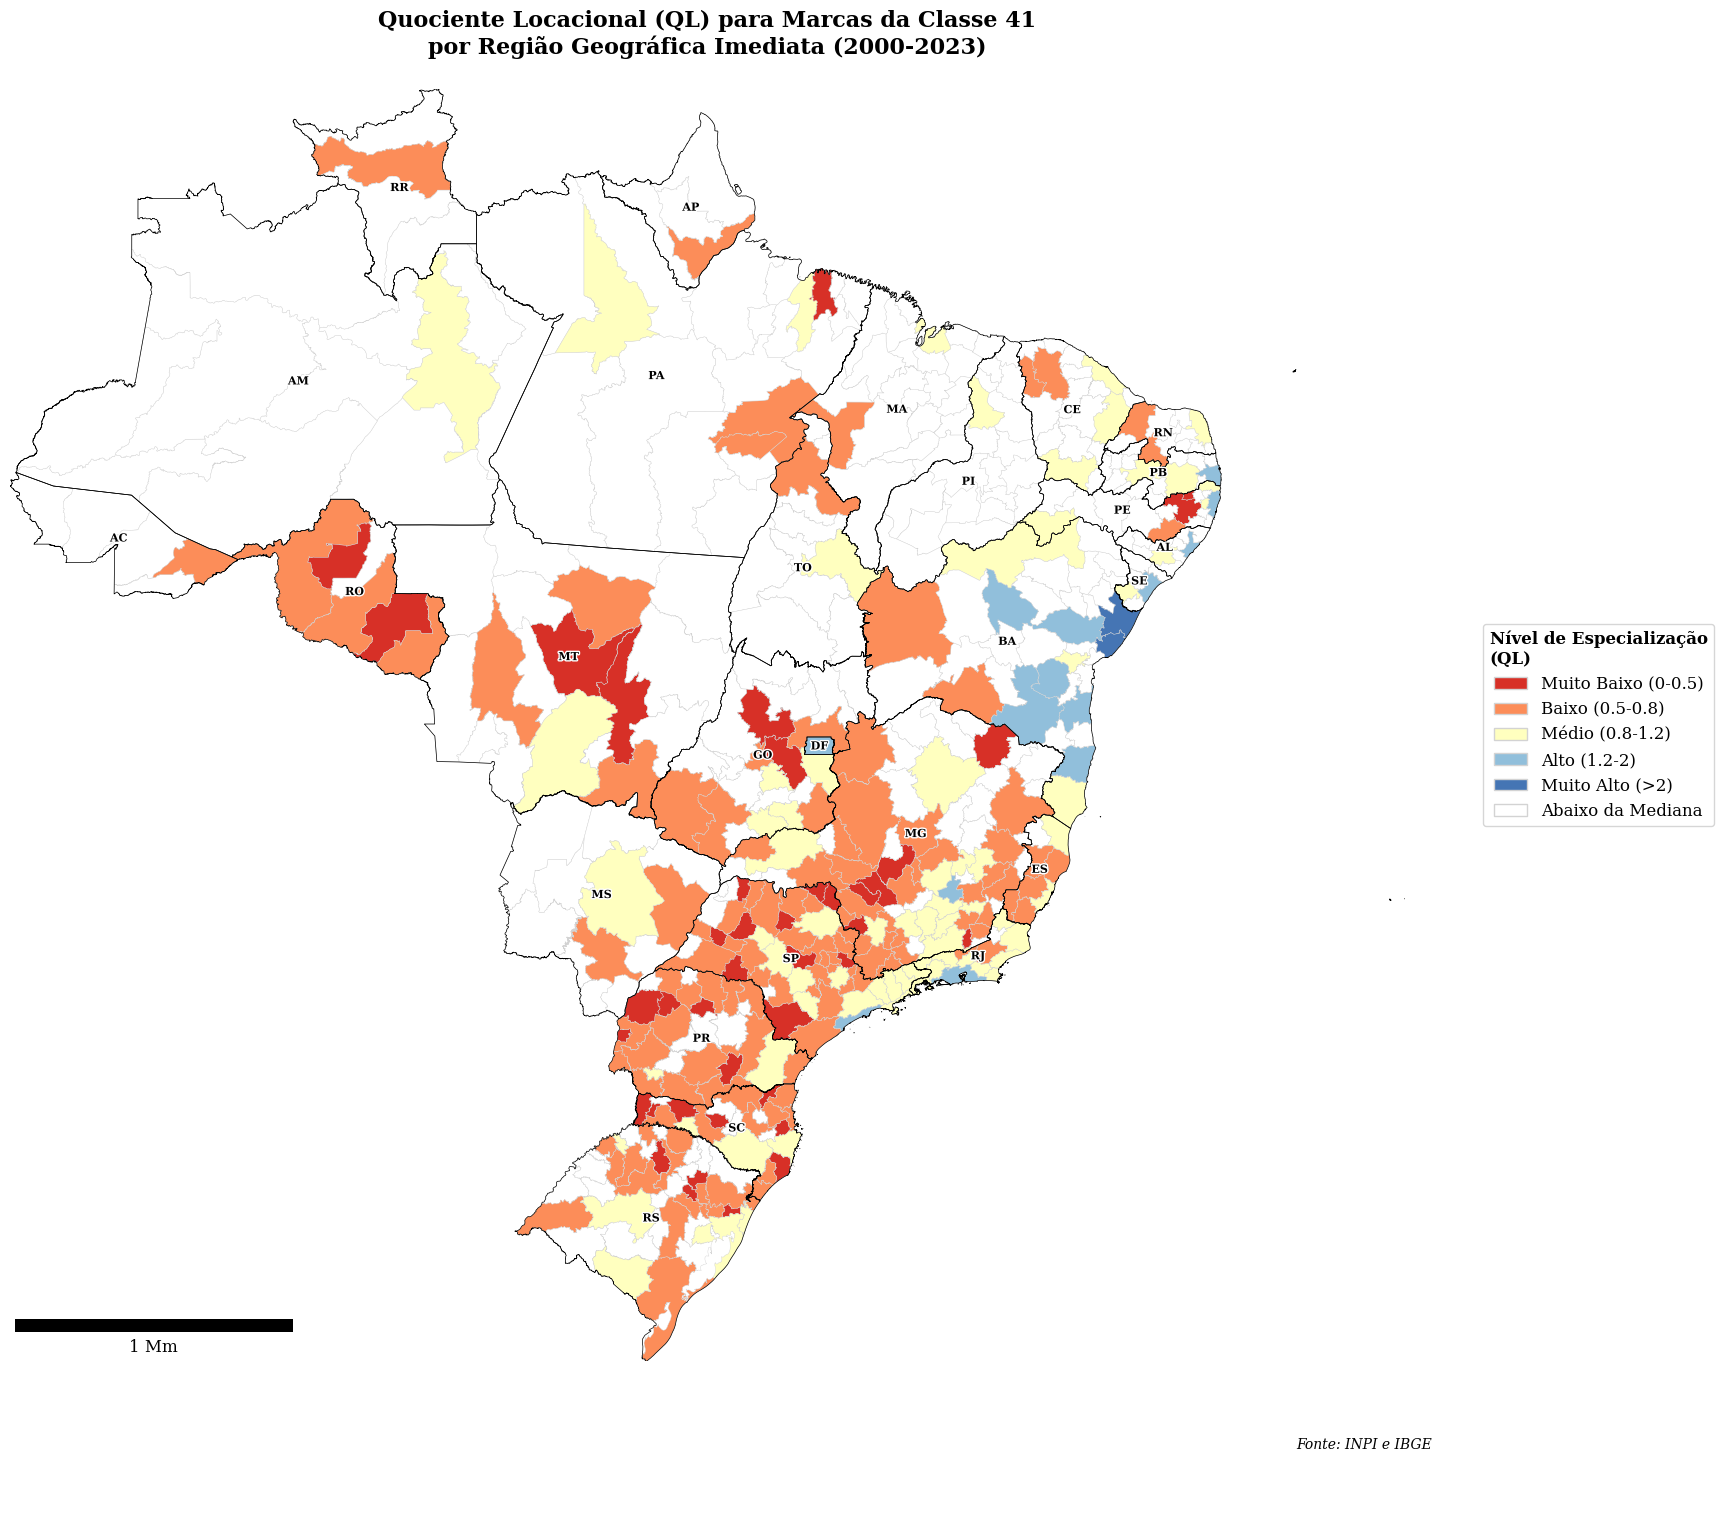

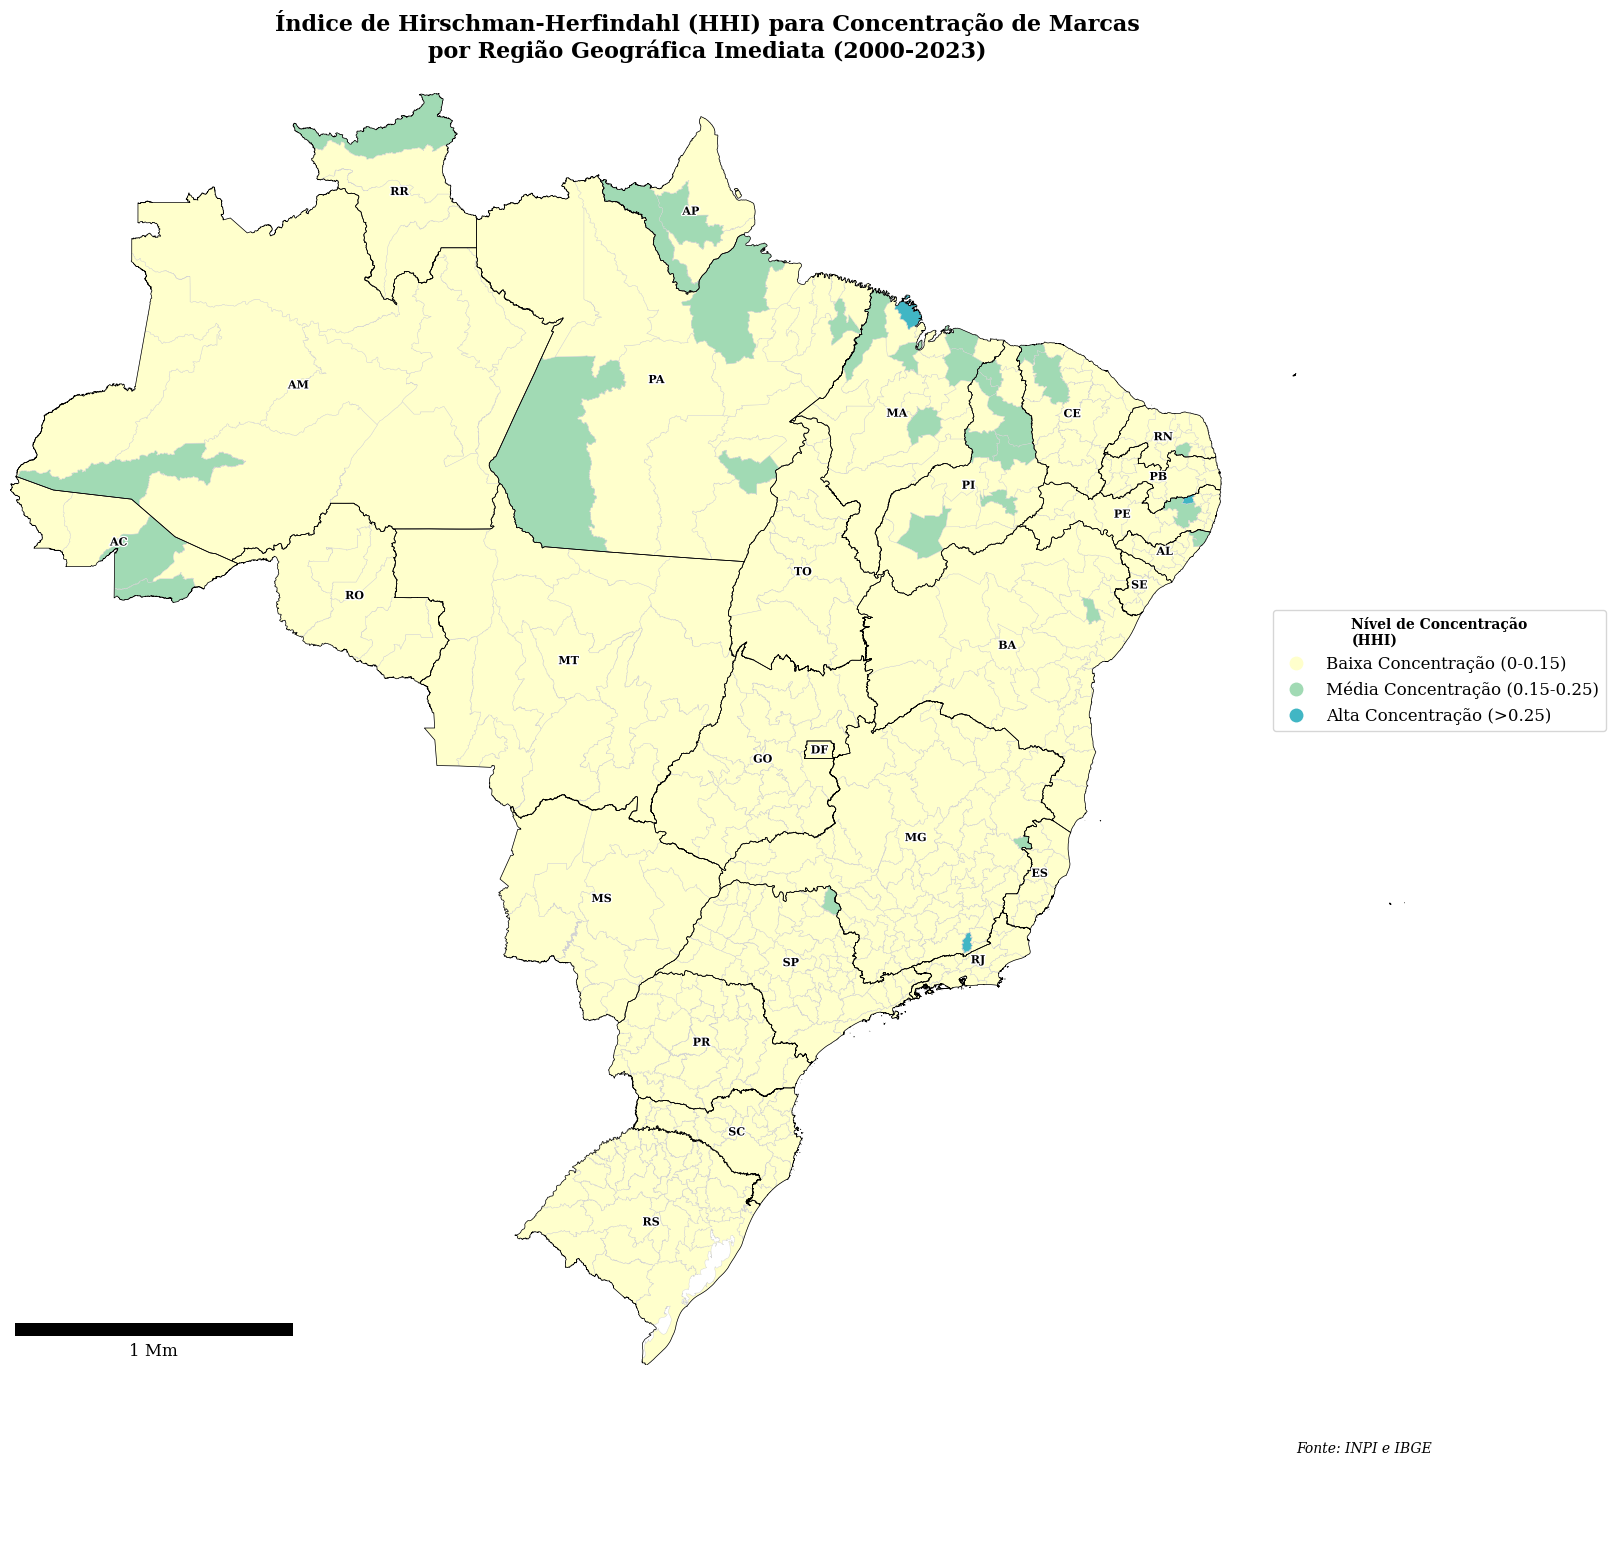

Resultados salvos em /content/drive/MyDrive/Mestrado UFMG/Dissertação/Shapefiles RGIs/indices_especializacao.xlsx
TOP 10 Regiões com Maior Especialização na Classe 35 (QL):
     cod_rgi  marcas_classe  total_marcas_rgi        ql
214   290033          172.0               559  2.497505
212   290031          144.0               522  2.239143
138   250007           43.0               156  2.237349
206   290025           80.0               302  2.150170
183   290002          332.0              1281  2.103675
182   290001        12778.0             49309  2.103422
135   250004           23.0                89  2.097624
211   290030          178.0               748  1.931560
213   290032          116.0               499  1.886893
201   290020          243.0              1063  1.855508

TOP 10 Regiões com Maior Concentração de Marcas (HHI):
    cod_rgi       hhi
250  310035  0.331964
154  260008  0.312626
69   210008  0.280992
95   220012  0.242630
23   140002  0.235537
33   150008  0.227153

In [ ]:
!pip install geopandas matplotlib contextily matplotlib-scalebar
# ====================
# 1. IMPORTAÇÕES
# ====================
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap, TwoSlopeNorm
from matplotlib.patheffects import withStroke
from matplotlib_scalebar.scalebar import ScaleBar
import contextily as ctx
import os
import numpy as np
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# ====================
# 2. CONFIGURAÇÕES
# ====================
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.dpi': 300
})

# ====================
# 3. CARREGAR DADOS (AJUSTE OS CAMINHOS!)
# ====================
# Configurar caminhos
PATH_DADOS = "/content/drive/MyDrive/Mestrado UFMG/Dissertação/Shapefiles RGIs/"
PATH_SHP_RGI = os.path.join(PATH_DADOS, "BR_RG_Imediatas_2024.shp")
PATH_SHP_ESTADOS = os.path.join(PATH_DADOS, "BR_UF_2024.shp")
#PATH_CSV_MARCAS = os.path.join(PATH_DADOS, "badepi_mrc_atualizada_rgi.csv")

# Carregar dados
dados = pd.read_csv("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/[2025.02]/Dissertação/Análise de Dados/2.BADEPI_Marcas_RGI.csv",
                encoding="ISO-8859-1", sep=",", quotechar='"', on_bad_lines="skip", engine="python")
rgi_geo = gpd.read_file(PATH_SHP_RGI)
estados = gpd.read_file(PATH_SHP_ESTADOS)

# Converter para datetime
dados['DT_DEPOSITO'] = pd.to_datetime(dados['DT_DEPOSIT_PROCESS'], dayfirst=True, errors='coerce')

# ====================
# 4. PREPARAR DADOS PARA ANÁLISE
# ====================
# Filtrar anos (2000-2023)
dados['ANO'] = dados['DT_DEPOSITO'].dt.year
dados = dados[(dados['ANO'] >= 2000) & (dados['ANO'] <= 2023)]

# Criar chave única para marca+classe
dados['MARCA_CLASSE'] = dados['NO_PROCESS'].astype(str) + '_' + dados['CD_CLASSE_NICE'].astype(str)

# Converter CRS
rgi_geo = rgi_geo.to_crs(epsg=3857)
estados = estados.to_crs(epsg=3857)

# ====================
# 5. CALCULAR QUOCIENTE LOCACIONAL (QL)
# ====================
def calcular_quociente_locacional(dados, classe_interesse=None):
    """
    Calcula o Quociente Locacional para marcas por RGI

    Args:
        dados: DataFrame com os dados de marcas
        classe_interesse: Classe específica para calcular o QL (None para todas)

    Returns:
        DataFrame com QL por RGI
    """
    # Agrupar por RGI e classe
    if classe_interesse:
        dados_filtrados = dados[dados['CD_CLASSE_NICE'] == classe_interesse].copy()
        grupo_rgi_classe = dados_filtrados.groupby(['cod_rgi', 'CD_CLASSE_NICE'])['MARCA_CLASSE'].nunique().reset_index()
    else:
        grupo_rgi_classe = dados.groupby(['cod_rgi', 'CD_CLASSE_NICE'])['MARCA_CLASSE'].nunique().reset_index()

    grupo_rgi_classe.rename(columns={'MARCA_CLASSE': 'marcas_classe'}, inplace=True)

    # Total de marcas por RGI
    total_rgi = dados.groupby('cod_rgi')['MARCA_CLASSE'].nunique().reset_index()
    total_rgi.rename(columns={'MARCA_CLASSE': 'total_marcas_rgi'}, inplace=True)

    # Total de marcas por classe no Brasil
    if classe_interesse:
        total_classe_brasil = dados_filtrados['MARCA_CLASSE'].nunique()
    else:
        total_classe_brasil = dados.groupby('CD_CLASSE_NICE')['MARCA_CLASSE'].nunique().reset_index()
        total_classe_brasil.rename(columns={'MARCA_CLASSE': 'total_marcas_classe_brasil'}, inplace=True)

    # Total de marcas no Brasil
    total_brasil = dados['MARCA_CLASSE'].nunique()

    # Calcular QL
    if classe_interesse:
        # Para uma classe específica
        ql_data = total_rgi.copy()
        ql_data = ql_data.merge(grupo_rgi_classe, on='cod_rgi', how='left')
        ql_data['marcas_classe'] = ql_data['marcas_classe'].fillna(0)

        ql_data['ql'] = (ql_data['marcas_classe'] / ql_data['total_marcas_rgi']) / (total_classe_brasil / total_brasil)
        print(total_classe_brasil)
        print(total_brasil)
    else:
        # Para todas as classes
        ql_data = grupo_rgi_classe.merge(total_rgi, on='cod_rgi', how='left')
        ql_data = ql_data.merge(total_classe_brasil, on='CD_CLASSE_NICE', how='left')

        ql_data['ql'] = (ql_data['marcas_classe'] / ql_data['total_marcas_rgi']) / (ql_data['total_marcas_classe_brasil'] / total_brasil)
        print(total_classe_brasil)
        print(total_brasil)

    return ql_data

# Calcular QL para a classe 35 (como exemplo)
ql_classe_35 = calcular_quociente_locacional(dados, classe_interesse=41)


# Calcular a mediana do total de marcas
mediana_marcas = ql_classe_35['total_marcas_rgi'].median()
# print(f"Mediana do total de marcas por RGI: {mediana_marcas}")

# # Filtrar apenas RGIs acima da mediana
# ql_classe_35_filtrado = ql_classe_35[ql_classe_35['total_marcas_rgi'] > mediana_marcas].copy()
# # print(f"RGIs acima da mediana: {len(ql_classe_35_filtrado)} de {len(ql_classe_35)}")

# =======================================================
# 6. MAPA DO QUOCIENTE LOCACIONAL (VERSÃO FINAL)
# =======================================================

# 1. Preparar dados para o mapa
rgi_geo['CD_RGI'] = rgi_geo['CD_RGI'].astype(str).str.strip()

# Calcular QL para a classe 41
ql_classe_41 = calcular_quociente_locacional(dados, classe_interesse=41)
mediana_marcas = ql_classe_41['total_marcas_rgi'].median()

# **CORREÇÃO AQUI** --> Converter 'cod_rgi' para string
ql_classe_41['cod_rgi'] = ql_classe_41['cod_rgi'].astype(str).str.strip()

# 2. Fazer merge de todos os dados do QL com o GeoDataFrame
mapa_ql_todos = rgi_geo.merge(
    ql_classe_41,
    left_on='CD_RGI',
    right_on='cod_rgi',
    how='left'
).fillna({'ql': 0, 'total_marcas_rgi': 0})

# 3. Identificar quais RGIs estão acima da mediana
mapa_ql_todos['acima_mediana'] = mapa_ql_todos['total_marcas_rgi'] > mediana_marcas

# 4. Classificar QL apenas para RGIs acima da mediana
bins = [0, 0.5, 0.8, 1.2, 2, float('inf')]
labels = ['Muito Baixo (0-0.5)', 'Baixo (0.5-0.8)', 'Médio (0.8-1.2)', 'Alto (1.2-2)', 'Muito Alto (>2)']
mapa_ql_todos['ql_class'] = pd.cut(
    mapa_ql_todos['ql'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# **CORREÇÃO AQUI** --> Adicionar a nova categoria antes de atribuir o valor
mapa_ql_todos['ql_class'] = mapa_ql_todos['ql_class'].cat.add_categories('Abaixo da Mediana')
mapa_ql_todos.loc[~mapa_ql_todos['acima_mediana'], 'ql_class'] = 'Abaixo da Mediana'

# 5. Definir um dicionário de cores para cada categoria
cores = {
    'Muito Baixo (0-0.5)': '#d73027',
    'Baixo (0.5-0.8)': '#fc8d59',
    'Médio (0.8-1.2)': '#ffffbf',
    'Alto (1.2-2)': '#91bfdb',
    'Muito Alto (>2)': '#4575b4',
    'Abaixo da Mediana': 'white'
}

# 6. Criar mapa
fig, ax = plt.subplots(figsize=(18, 18))

# Plotar as RGIs usando o dicionário de cores
mapa_ql_todos.plot(
    column='ql_class',
    color=[cores.get(cat, 'lightgrey') for cat in mapa_ql_todos['ql_class']],
    edgecolor='#d3d3d3',
    linewidth=0.3,
    ax=ax,
    legend=False
)

# Bordas dos estados
estados.boundary.plot(
    ax=ax,
    color='black',
    linewidth=0.5
)

# Nomes dos estados
for idx, row in estados.iterrows():
    centroid = row.geometry.centroid
    ax.text(
        centroid.x,
        centroid.y,
        row['SIGLA_UF'],
        ha='center',
        va='center',
        fontsize=8,
        color='black',
        weight='bold',
        path_effects=[withStroke(linewidth=2, foreground='white')]
    )

# Limitar a visualização ao território brasileiro
xmin, ymin, xmax, ymax = estados.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Adicionar barra de escala
ax.add_artist(ScaleBar(dx=1, units='m', location='lower left', scale_loc='bottom', length_fraction=0.2))

# 7. Título e legenda
plt.title('Quociente Locacional (QL) para Marcas da Classe 41\npor Região Geográfica Imediata (2000-2023)',
          fontsize=16, pad=25, weight='bold')

# Criar legenda personalizada com os patches de cores
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=cores[label], edgecolor='#d3d3d3', label=label)
                   for label in labels]
legend_elements.append(Patch(facecolor='white', edgecolor='#d3d3d3', label='Abaixo da Mediana'))

legenda = ax.legend(handles=legend_elements,
                    title='Nível de Especialização\n(QL)',
                    loc='center left', bbox_to_anchor=(1.05, 0.5))
legenda.get_title().set_fontweight('bold')

# Fonte
plt.annotate('Fonte: INPI e IBGE', xy=(0.72, 0.05), xycoords='figure fraction', fontsize=10, style='italic')

# Salvar
plt.axis('off')
plt.savefig(
    os.path.join(PATH_DADOS, 'mapa_ql_classe_41_corrigido.png'),
    bbox_inches='tight',
    pad_inches=0.3,
    dpi=300
)
plt.show()

# ====================
# 7. ÍNDICE DE HIRSCHMAN-HERFINDAHL (HHI)
# ====================
def calcular_hhi(dados):
    """
    Calcula o Índice de Hirschman-Herfindahl (HHI) por RGI
    Mede a concentração de marcas em classes por região
    """
    # Calcular participação de cada classe por RGI
    participacao_classe = dados.groupby(['cod_rgi', 'CD_CLASSE_NICE'])['MARCA_CLASSE'].nunique().reset_index()
    total_marcas_rgi = dados.groupby('cod_rgi')['MARCA_CLASSE'].nunique().reset_index()

    participacao_classe = participacao_classe.merge(total_marcas_rgi, on='cod_rgi')
    participacao_classe['participacao'] = participacao_classe['MARCA_CLASSE_x'] / participacao_classe['MARCA_CLASSE_y']

    # Calcular HHI (soma dos quadrados das participações)
    hhi = participacao_classe.groupby('cod_rgi')['participacao'].apply(lambda x: sum(x**2)).reset_index()
    hhi.rename(columns={'participacao': 'hhi'}, inplace=True)

    return hhi

# Calcular HHI
hhi_rgi = calcular_hhi(dados)

# ====================
# 8. MAPA DO ÍNDICE HHI
# ====================
# Preparar dados para o mapa
hhi_rgi['cod_rgi'] = hhi_rgi['cod_rgi'].astype(str).str.strip()
mapa_hhi = rgi_geo.merge(
    hhi_rgi,
    left_on='CD_RGI',
    right_on='cod_rgi',
    how='left'
).fillna({'hhi': 0})

# Classificar HHI para visualização
mapa_hhi['hhi_class'] = pd.cut(
    mapa_hhi['hhi'],
    bins=[0, 0.15, 0.25, 1],
    labels=['Baixa Concentração (0-0.15)', 'Média Concentração (0.15-0.25)', 'Alta Concentração (>0.25)'],
    include_lowest=True
)

# Criar mapa HHI
fig, ax = plt.subplots(figsize=(18, 18))

# Cores para HHI
cores_hhi = ['#ffffcc', '#a1dab4', '#41b6c4']
cmap_hhi = LinearSegmentedColormap.from_list('hhi_sequential', colors=cores_hhi, N=3)

# Plotar RGIs
mapa_hhi.plot(
    column='hhi_class',
    cmap=cmap_hhi,
    edgecolor='#d3d3d3',
    linewidth=0.3,
    legend=True,
    ax=ax,
    missing_kwds={'color': 'lightgrey'},
    categorical=True
)

# Bordas dos estados
estados.boundary.plot(
    ax=ax,
    color='black',
    linewidth=0.5
)

# Nomes dos estados
for idx, row in estados.iterrows():
    centroid = row.geometry.centroid
    ax.text(
        centroid.x,
        centroid.y,
        row['SIGLA_UF'],
        ha='center',
        va='center',
        fontsize=8,
        color='black',
        weight='bold',
        path_effects=[withStroke(linewidth=2, foreground='white')]
    )

# Limitar a visualização
xmin, ymin, xmax, ymax = estados.total_bounds
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)

# Adicionar barra de escala
ax.add_artist(ScaleBar(dx=1, units='m', location='lower left', scale_loc='bottom', length_fraction=0.2))

# Título
plt.title('Índice de Hirschman-Herfindahl (HHI) para Concentração de Marcas\npor Região Geográfica Imediata (2000-2023)',
          fontsize=16, pad=25, weight='bold')

# Legenda
legenda = ax.get_legend()
legenda.set_bbox_to_anchor((1.15, 0.6))
legenda.set_title('Nível de Concentração\n(HHI)', prop={'size': 10, 'weight': 'bold'})

# Fonte
plt.annotate('Fonte: INPI e IBGE', xy=(0.72, 0.05), xycoords='figure fraction', fontsize=10, style='italic')

# Salvar
plt.axis('off')
plt.savefig(
    os.path.join(PATH_DADOS, 'mapa_hhi.png'),
    bbox_inches='tight',
    pad_inches=0.3,
    dpi=300
)
plt.show()

# ====================
# 9. SALVAR RESULTADOS EM EXCEL
# ====================
with pd.ExcelWriter(os.path.join(PATH_DADOS, 'indices_especializacao.xlsx')) as writer:
    # QL para classe 35
    ql_classe_35.to_excel(writer, sheet_name='QL_Classe_35', index=False)

    # HHI por RGI
    hhi_rgi.to_excel(writer, sheet_name='HHI', index=False)

    # Estatísticas descritivas
    stats_ql = pd.DataFrame({
        'Métrica': ['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo', 'Regiões com QL > 1'],
        'Valor': [
            ql_classe_35['ql'].mean(),
            ql_classe_35['ql'].median(),
            ql_classe_35['ql'].std(),
            ql_classe_35['ql'].min(),
            ql_classe_35['ql'].max(),
            (ql_classe_35['ql'] > 1).sum()
        ]
    })
    stats_ql.to_excel(writer, sheet_name='Estatisticas_QL', index=False)

    stats_hhi = pd.DataFrame({
        'Métrica': ['Média', 'Mediana', 'Desvio Padrão', 'Mínimo', 'Máximo', 'Regiões com HHI > 0.25'],
        'Valor': [
            hhi_rgi['hhi'].mean(),
            hhi_rgi['hhi'].median(),
            hhi_rgi['hhi'].std(),
            hhi_rgi['hhi'].min(),
            hhi_rgi['hhi'].max(),
            (hhi_rgi['hhi'] > 0.25).sum()
        ]
    })
    stats_hhi.to_excel(writer, sheet_name='Estatisticas_HHI', index=False)

print(f"Resultados salvos em {os.path.join(PATH_DADOS, 'indices_especializacao.xlsx')}")

# ====================
# 10. TOP REGIÕES ESPECIALIZADAS
# ====================
print("TOP 10 Regiões com Maior Especialização na Classe 35 (QL):")
top_ql = ql_classe_35.nlargest(10, 'ql')[['cod_rgi', 'marcas_classe', 'total_marcas_rgi', 'ql']]
print(top_ql)

print("\nTOP 10 Regiões com Maior Concentração de Marcas (HHI):")
top_hhi = hhi_rgi.nlargest(10, 'hhi')[['cod_rgi', 'hhi']]
print(top_hhi)



In [ ]:
# ====================
# 0. INSTALAÇÃO (se necessário no Colab)
# ====================
# !pip install geopandas matplotlib contextily matplotlib-scalebar

# ====================
# 1. IMPORTAÇÕES
# ====================
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.patheffects import withStroke
from matplotlib_scalebar.scalebar import ScaleBar
from matplotlib.patches import Patch
from pathlib import Path
import contextily as ctx

# ====================
# 2. CONFIGURAÇÕES
# ====================
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'figure.facecolor': 'white',
    'axes.facecolor': 'white',
    'savefig.dpi': 300
})

# ====================
# 3. CAMINHOS
# ====================
PATH_DADOS = Path("/content/drive/MyDrive/Mestrado UFMG/Dissertação/Shapefiles RGIs/")
PATH_SHP_RGI = PATH_DADOS / "BR_RG_Imediatas_2024.shp"
PATH_SHP_ESTADOS = PATH_DADOS / "BR_UF_2024.shp"
PATH_CSV = Path("/content/drive/MyDrive/[2025] pastas de doc importantes/Mestrado UFMG/[2025.02]/Dissertação/Análise de Dados/2.BADEPI_Marcas_RGI.csv")

# ====================
# 4. FUNÇÕES DE CARREGAMENTO E PREPARO
# ====================
def carregar_dados(path_csv, path_shp_rgi, path_shp_estados):
    # Carregar dados de marcas
    dados = pd.read_csv(
        path_csv, encoding="ISO-8859-1",
        sep=",", quotechar='"', on_bad_lines="skip", engine="python"
    )
    # Converter datas
    dados['DT_DEPOSITO'] = pd.to_datetime(dados['DT_DEPOSIT_PROCESS'], dayfirst=True, errors='coerce')
    dados['ANO'] = dados['DT_DEPOSITO'].dt.year
    dados = dados.query("2000 <= ANO <= 2023").copy()

    # Criar chave única marca+classe
    dados['MARCA_CLASSE'] = dados['NO_PROCESS'].astype(str) + '_' + dados['CD_CLASSE_NICE'].astype(str)

    # Shapefiles
    rgi_geo = gpd.read_file(path_shp_rgi).to_crs(epsg=3857)
    estados = gpd.read_file(path_shp_estados).to_crs(epsg=3857)

    return dados, rgi_geo, estados

# ====================
# 5. FUNÇÕES DE CÁLCULO
# ====================
def calcular_quociente_locacional(dados, classe_interesse=None):
    """
    Calcula o Quociente Locacional (QL).
    """
    if classe_interesse:
        dados_filtrados = dados[dados['CD_CLASSE_NICE'] == classe_interesse].copy()
        grupo_rgi_classe = (
            dados_filtrados.groupby(['cod_rgi', 'CD_CLASSE_NICE'])['MARCA_CLASSE']
            .nunique().reset_index()
        )
    else:
        grupo_rgi_classe = (
            dados.groupby(['cod_rgi', 'CD_CLASSE_NICE'])['MARCA_CLASSE']
            .nunique().reset_index()
        )
    grupo_rgi_classe.rename(columns={'MARCA_CLASSE': 'marcas_classe'}, inplace=True)

    # Totais
    total_rgi = dados.groupby('cod_rgi')['MARCA_CLASSE'].nunique().reset_index(name='total_marcas_rgi')
    total_brasil = dados['MARCA_CLASSE'].nunique()

    if classe_interesse:
        total_classe_brasil = dados_filtrados['MARCA_CLASSE'].nunique()
        ql_data = total_rgi.merge(grupo_rgi_classe, on='cod_rgi', how='left').fillna({'marcas_classe': 0})
        ql_data['ql'] = (ql_data['marcas_classe'] / ql_data['total_marcas_rgi']) / (total_classe_brasil / total_brasil)
    else:
        total_classe_brasil = (
            dados.groupby('CD_CLASSE_NICE')['MARCA_CLASSE']
            .nunique().reset_index(name='total_marcas_classe_brasil')
        )
        ql_data = grupo_rgi_classe.merge(total_rgi, on='cod_rgi', how='left')
        ql_data = ql_data.merge(total_classe_brasil, on='CD_CLASSE_NICE', how='left')
        ql_data['ql'] = (ql_data['marcas_classe'] / ql_data['total_marcas_rgi']) / \
                        (ql_data['total_marcas_classe_brasil'] / total_brasil)

    return ql_data

def calcular_hhi(dados):
    """
    Calcula o Índice de Hirschman-Herfindahl (HHI).
    """
    participacao = (
        dados.groupby(['cod_rgi', 'CD_CLASSE_NICE'])['MARCA_CLASSE'].nunique().reset_index()
    )
    total_rgi = dados.groupby('cod_rgi')['MARCA_CLASSE'].nunique().reset_index(name='total_marcas_rgi')
    participacao = participacao.merge(total_rgi, on='cod_rgi')
    participacao['participacao'] = participacao['MARCA_CLASSE'] / participacao['total_marcas_rgi']
    hhi = participacao.groupby('cod_rgi')['participacao'].apply(lambda x: (x**2).sum()).reset_index(name='hhi')
    return hhi

# ====================
# 6. USO
# ====================
dados, rgi_geo, estados = carregar_dados(PATH_CSV, PATH_SHP_RGI, PATH_SHP_ESTADOS)

# Exemplo: calcular QL para a classe 41
ql_classe_41 = calcular_quociente_locacional(dados, classe_interesse=41)

# Calcular HHI
hhi_rgi = calcular_hhi(dados)

print("Prévia QL (classe 41):")
print(ql_classe_41.head())

print("\nPrévia HHI:")
print(hhi_rgi.head())


Prévia QL (classe 41):
   cod_rgi  total_marcas_rgi  CD_CLASSE_NICE  marcas_classe        ql
0   110001              3843            41.0          376.0  0.794159
1   110002               959            41.0           47.0  0.397804
2   110003               447            41.0           18.0  0.326855
3   110004              2447            41.0          179.0  0.593757
4   110005              1931            41.0           89.0  0.374108

Prévia HHI:
   cod_rgi       hhi
0   110001  0.107587
1   110002  0.107243
2   110003  0.096527
3   110004  0.105848
4   110005  0.106171
